<a href="https://colab.research.google.com/github/Lucas-hearc/KeywordSpotting/blob/main/RCNN_KWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install librosa
!pip install numpy
!pip install matplotlib
!pip install tensorflow

In [2]:
import os
import zipfile
from google.colab import drive
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import tensorflow

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive')
os.chdir('/content/drive/My Drive/DATA')

Mounted at /content/drive


In [3]:
%cd content/

[Errno 2] No such file or directory: 'content/'
/content


In [92]:
x1 = np.load('content/X_split_test.npy')
x2 = np.load('content/X_split_train.npy')
t1=np.shape(x1)
t2=np.shape(x2)

print(np.shape(x1[1]))

(1600,)


In [7]:
%cd  ..

/


In [41]:
%cd content/drive/MyDrive/DATA/data/data/training/

/content/drive/MyDrive


In [40]:
!pip install --user git+https://github.com/python/processing.git


  Cloning https://github.com/python/processing.git to /tmp/pip-req-build-gnh500te
  Running command git clone --filter=blob:none --quiet https://github.com/python/processing.git /tmp/pip-req-build-gnh500te
  fatal: could not read Username for 'https://github.com': No such device or address
  error: subprocess-exited-with-error
  
  × git clone --filter=blob:none --quiet https://github.com/python/processing.git /tmp/pip-req-build-gnh500te did not run successfully.
  │ exit code: 128
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git clone --filter=blob:none --quiet https://github.com/python/processing.git /tmp/pip-req-build-gnh500te did not run successfully.
│ exit code: 128
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [52]:
import os
import librosa
import numpy as np
import sys
sys.path.append('/content/drive/MyDrive/DATA/data/data/code')
import functions
import feature
import processing



audioFile = '/content/drive/MyDrive/DATA/data/data/testing/parole/Parole.unknown.40foevmq.ingestion-dffd874c6-lzqhq.s56.wav'

# Paramètres MFCC
nmfcc = 32
frame_length = 0.02
frame_stride = 0.02
filter_number = 32
fft_length = 256
normalization_window_size = 101

audio, sr = librosa.load(audioFile)
audio = [11, 9, 6, -3, -14, -16, -21, -25, -15, -13, -9, -7, -14, -13, -25, -29, -20, -18, -28, -23, -28, -18, -1, -5, 2, 14, 14, 18, 18, 15, 11, 10, 1, 14, 13, 25, 27, 25, 25, 16, 15, 6, 3, 0, -3, 10, -8, -13, -9, -11, -11, -13, -18, -4, -7, -5, -6, -14, -12, -12, -11, 0, -5, -14, -15, -15, -18, -15, -9, -7, -9, -9, -9, -18, -28, -28, -12, -6, 0, 12, 22, 11, 11, 9, 14, 12, 13, 8, 6, 28, 33, 32, 30, 21, 24, 30, 28, 11, 12, -7, -17, -15, -14, -6, -7, 3, -18, -18, -12, -21, -22, -14, 2, 17, 19, 19, 17, 18, 6, 3, 6, 15, 20, 34, 23, 9, 12, 6, 3, 3, 4, 0, -10, -11, -21, -24, -20, -11, -8, -8, -12, -13, -4, -8, -1, -2, 2, 5, 13, 16, 6, 0, 1, 5, -3, 0, -3, -3, 1, -3, -6, -7, -4, 13, 10, -7, -7, -10, -7, -19, -6, -2, 2, 11, 5, -9, -24, -19, -29, -34, -27, -16, -23, -11, -2, -9, -18, -8, -10, -12, -8, -12, -12, -18, -22, -19, -20, -4, 11, 8, 2, 0, -9, -7, -4, -1, 2, 5, 11, 7, 2, 13, 23, 27, 26, 30, 25, 29, 41, 32, 26, 24, 28, 20, 7, 0, -3, -11, -6, -7, -8, -2, -1, -1, -6, -11, 4, 3, 4, 3, 0, 13, 14, 18, 20, 27, 26, 36, 44, 34, 16, 4, 5, -1, -5, -3, -13, -20, -23, -29, -23, -33, -40, -47, -36, -28, -38, -35, -37, -37, -19, -2, -2, 2, 0, -3, 6, 8, 5, 5, 14, 16, 23, 17, 19, 8, 17, 18, 23, 27, 28, 25, 11, 7, 0, 1, 5, 6, -1, -1, -1, 0, -1, -1, -8, -12, -7, -3, -6, -11, -8, -22, -19, -13, -9, -13, -11, -2, -9, -7, -18, -14, 0, 8, 12, 11, 23, 24, 10, 10, -9, -19, -12, -16, -22, -12, -6, -2, -9, -2, 0, -4, -3, -2, -2, -7, -5, 4, 19, 32, 30, 30, 23, 20, 10, 6, 1, 7, 8, 0, 14, 15, 1, 0, 9, 8, -13, -14, -18, -22, -7, -4, -19, -2, 8, 2, -9, -18, -8, 1, -10, 2, 1, 11, 21, 17, 6, 0, -4, -2, 7, 6, 1, 7, 26, 15, 26, 19, 13, 12, 14, 7, 6, -1, -13, -16, -10, 3, 8, 10, 1, 2, -3, -12, -21, -25, -20, -11, -11, -17, -25, -12, -10, -8, -9, -1, 7, -7, -11, -8, 0, -1, 13, 23, 25, 20, 16, 7, 3, 2, -8, -5, -8, -2, -1, -15, -13, -22, -22, -27, -18, -4, -11, -16, -31, -22, -15, -17, -15, -11, -6, -9, -5, -5, -7, -5, 9, 9, -1, 4, 14, 13, 2, 6, -3, -3, 0, 1, 10, 13, 12, 6, 5, 12, 9, 12, 16, 23, 29, 33, 34, 32, 27, 28, 34, 36, 38, 26, 6, -6, -7, -10, -7, 5, 5, 12, 5, 7, 2, 8, -2, -10, -9, -9, 1, -6, -9, -5, -6, -2, -6, 0, -16, -20, -25, -18, -6, -4, 10, -9, -24, -29, -27, -36, -42, -34, -24, -3, 10, 16, 21, 12, 6, 0, -16, -33, -8, -2, -14, -20, -10, -5, -16, -16, -9, -6, -15, -16, -15, -10, -9, 0, 13, 0, -6, -7, 3, 4, -1, 19, 33, 46, 33, 22, 7, 13, 17, 7, 6, 10, 12, 2, 12, -1, -6, 7, 5, -3, -10, -4, 4, 21, 28, 22, 18, 23, 23, 10, 12, 5, -5, 0, -7, -9, -2, 0, 11, 5, -1, -14, -28, -31, -18, -12, -5, 4, 5, 6, 4, 13, 12, 4, 10, 14, 11, 3, -1, 15, 14, 3, 5, -7, -10, -14, -23, -27, -26, -17, -21, -16, -18, -17, -22, -19, -14, -16, -5, -2, 0, -8, -2, 1, 2, 7, 5, 0, 5, 8, 14, 22, 25, 35, 51, 36, 34, 33, 27, 17, 22, 11, 5, 2, -9, -17, -18, -6, -17, -15, -2, 0, -3, -5, -1, -14, -7, -3, 7, 6, 14, 16, 15, 22, 10, 2, -1, -15, -22, -21, -20, -24, -20, -15, -12, -9, -9, -15, -20, -12, 1, 9, 14, 21, 27, 21, 13, -16, -15, -9, -11, -10, -3, -20, -18, -23, -31, -26, -25, -21, -18, -13, -14, -5, -5, -1, 17, 14, 23, 22, 11, 6, 2, -7, -1, 16, 22, 27, 29, 20, 9, -4, -6, -22, -10, -3, 0, 5, 7, 13, 10, 8, 8, 4, -8, 2, 6, 5, 17, 21, 31, 20, 17, 13, 9, 10, 12, 2, 7, -1, -14, -18, -27, -21, -6, -4, -10, -2, 7, 10, 4, -4, -1, 3, 6, 10, 7, 8, 9, 17, -1, -8, -8, -22, -17, -2, 3, -2, 3, 10, 10, 6, 13, 8, -3, -13, -20, -14, -17, -16, -3, -2, 7, 15, 13, 6, -8, -7, -11, -9, -12, -11, -7, -7, -14, -21, -19, -15, -11, -11, -2, -10, 2, -1, -2, -16, -21, -25, -29, -31, -26, -14, -4, 1, 5, 1, -1, -1, 0, 0, 2, -3, 1, 5, 4, 7, 1, -3, -4, -4, -14, -13, -21, -7, 2, -2, -7, 0, 17, 21, 31, 32, 32, 35, 40, 32, 31, 35, 39, 35, 24, 9, 10, 8, 4, -7, -10, -9, -9, 0, 3, 9, 0, 7, -5, -10, 1, 2, 12, 3, 11, 0, 6, 15, 14, 15, 20, 21, 5, -4, -17, -15, -27, -20, -14, -12, -8, -19, -8, -13, -29, -31, -35, -28, -22, -10, -9, 5, 7, 0, -1, -12, -7, 5, 9, -3, 6, 9, 16, 21, 17, 6, 1, -5, -18, -23, -19, -19, -21, -19, -2, 0, 12, 6, 6, 9, 14, 18, 10, 23, 18, 10, 16, 21, 21, 12, 22, 23, 21, 1, -14, -27, -16, -14, -25, -19, -20, -18, -19, -26, -16, -9, -5, -6, -1, 2, 8, 14, 14, 9, 6, 6, 22, 22, 7, 0, 0, -9, -14, -21, -24, -11, -3, -1, -8, 3, 17, 23, 19, 24, 24, 21, 5, 0, -4, -9, 19, 22, 16, 10, 16, 19, 12, 9, 6, 5, 16, 22, 10, 6, 16, 20, 5, -12, -14, -5, -9, -11, -21, -5, -8, -16, -17, -14, -4, 4, 4, 5, -5, -8, -3, -6, -4, -8, -5, 0, 0, -10, -19, -12, -7, -9, -12, -6, -13, -22, -11, -9, 7, 9, 14, 23, 12, 19, 21, 14, 1, 2, 4, -1, -6, -6, -8, -3, -6, -12, -31, -32, -35, -42, -14, 0, 0, 1, -5, 3, 7, 4, -12, -5, -3, -16, -16, -12, -1, 3, 6, -6, -5, -5, 9, 12, 18, 14, 15, 31, 28, 20, 20, 16, 7, -12, -21, -15, -7, -2, -4, 0, -2, 0, -10, -8, -2, 4, -6, 6, 16, 26, 22, 15, 7, 2, 0, 10, 10, 3, -7, -12, -10, -8, -12, -17, -11, 0, 1, 0, 0, 1, -6, -7, 4, 7, 0, 18, 18, 6, 7, 3, -7, -7, -12, -18, -14, -13, -13, -5, -7, 0, 3, 8, 9, 9, -4, 0, 0, -4, 7, -1, 0, 4, 13, -1, -8, 6, 2, 2, 0, 9, 3, -3, -15, -20, -15, -14, -23, -21, -7, -5, -5, 1, -4, 0, 3, 8, 6, 10, 16, 18, 13, -1, -7, -2, 2, -3, 7, -8, -18, -4, -19, -19, -11, 4, 9, 10, 11, -4, -5, -6, 3, 10, 10, 9, 23, 25, 11, 6, 2, 0, -1, 0, 0, 0, 9, 10, -4, -6, -3, -2, 0, 6, 13, 14, 9, 11, 0, 0, 1, 2, 6, 10, 14, 4, 2, -5, -4, -17, -8, 3, 10, 16, 18, 9, 3, 7, 10, 3, 11, 14, 30, 21, 30, 43, 41, 24, 27, 16, 7, 20, 0, -14, -15, -19, -25, -30, -40, -46, -46, -48, -41, -46, -40, -23, -11, -7, -6, -5, -6, -5, -10, -1, 13, 18, 29, 23, 11, 12, -2, -8, -1, -8, 3, 9, 10, -3, -11, -3, -7, -15, -16, -28, -32, -26, -28, -36, -24, -21, -15, -8, -12, -13, -10, 0, -6, -4, 11, 12, 17, 27, 36, 35, 32, 30, 29, 33, 19, 11, 4, 0, -3, -14, 0, 3, 27, 30, 17, 9, 2, 6, 9, 7, -3, 0, 16, 10, 14, 13, 13, 22, 14, 10, 12, 1, 2, 4, -6, -15, -8, -25, -13, -11, -25, -21, -16, -24, -28, -27, -24, -18, -2, 12, 9, 19, 15, 5, -3, -2, 2, -3, 2, 3, 9, 16, 20, 6, -1, -1, 2, -1, -7, -19, -21, -22, -20, -13, -20, -9, 9, 18, 21, 23, 13, 25, 26, 22, 10, 8, 29, 27, 16, 3, 0, -2, -7, -14, -24, -12, -10, -16, -32, -39, -40, -35, -25, -32, -38, -33, -24, -15, -8, 1, 9, 11, 10, 25, 23, 23, 20, 14, 6, 6, 6, 8, 14, 7, 16, 10, 12, 16, 8, 15, 5, 6, 0, -25, -36, -23, -10, 0, -3, -1, 2, -7, -1, -2, -7, 0, 2, 4, -3, 5, 10, 12, 7, 0, 11, 15, 14, 0, -4, -2, -12, 3, -3, 1, 10, 7, -14, -22, -10, -20, -23, -16, -15, -23, -16, -6, -3, -2, 11, 15, -5, -10, -12, -6, -5, 2, 11, 16, 22, 19, 34, 34, 18, -5, -13, -14, -18, -10, -11, 1, 10, 7, 4, 0, 2, -6, -9, -11, -15, -10, -3, 8, -2, -6, -15, -13, -7, -5, 0, 4, 11, 19, 27, 24, 21, 14, 6, 0, 9, 28, 37, 32, 14, 28, 31, 32, 31, 11, 4, 11, -1, -15, -19, -14, -1, -8, -14, -19, -11, -1, -6, -27, -29, -28, -28, -31, -31, -25, -13, -12, -13, -4, 0, -4, -15, -23, -23, -17, -3, 8, 16, 26, 28, 25, 27, 0, 0, 9, 4, -3, 5, 18, 16, 21, 24, 22, 9, -1, -11, -11, -21, -29, -16, -3, -5, -6, 2, 0, 0, 6, 8, 5, 12, 11, 18, 20, 22, 15, 6, 6, 0, -12, -9, -5, -10, -11, 7, 8, 14, 26, 21, 23, 25, 18, 7, 9, 12, 14, 10, 3, 15, 13, 10, 7, 13, 8, 0, 2, 3, -7, -16, -20, -22, -25, -16, -7, 2, -1, -3, -15, -19, -24, -31, -31, -37, -29, -25, -15, -12, -10, -19, -23, -30, -21, -8, -5, -4, -8, -3, 1, 1, 5, 8, 20, 14, 22, 18, 7, 11, 20, 13, 8, 5, 12, 20, 11, 0, 0, 0, 8, 5, 9, 10, 7, 4, 0, -6, -8, -9, -4, -1, -3, -10, -15, -17, -4, 6, 1, 5, 1, 0, 0, -5, -16, -7, -12, -9, -15, -14, -26, -17, -2, -9, -11, -1, -2, 0, 1, 5, 10, 0, 7, 7, 8, 5, 2, -3, -4, -7, -4, -5, -7, 8, 11, 23, 6, 3, -5, 2, 5, 4, 2, 0, 9, 1, 4, 2, 7, 11, 11, 22, 26, 25, 19, 6, 5, -8, -11, -14, -17, -17, 10, 7, -5, -5, 0, 3, 2, -3, 15, 20, 15, 6, -7, -20, -8, -12, -5, -11, -13, -10, -6, -11, -21, -16, -11, -11, -6, -3, -5, -7, 2, 1, 0, 3, 12, 11, 10, 2, 2, 0, 6, 4, 10, 17, 14, 19, 19, 9, 0, -2, -9, -15, -16, -13, -5, -6, -3, -4, 1, -2, -6, 1, -8, -26, -28, -19, -20, -11, 6, 0, -3, -3, -4, -14, -19, -20, -17, -3, 4, 12, 27, 32, 23, 20, 14, 7, 8, 9, 14, 24, 25, 17, 13, 7, 1, -7, -10, -8, -7, -1, 9, 8, -3, 7, 9, -2, 0, 0, -1, -8, -9, -11, 0, 7, -8, -6, 10, 12, 2, 1, 2, 14, 23, 21, 11, 10, 10, 1, 0, -5, 2, 3, 11, 10, 5, 8, 8, 6, 11, 2, -3, 5, 2, 2, 6, 6, 2, 3, 6, -2, -3, -1, 8, 7, -1, 0, 2, -1, -11, -20, -4, -11, -2, -15, -21, -16, -17, -22, -23, -25, -22, -17, -13, -2, 0, 9, 18, 7, 5, -3, -1, -16, -11, 0, 2, 3, 3, -5, -20, -29, -25, -13, -24, -23, -18, -8, 8, 23, 25, 20, 23, 24, 22, 10, 2, 0, -4, -4, -10, -9, -15, -15, -19, -16, -5, -8, -11, -2, 2, 7, 4, 12, 7, 28, 30, 24, 29, 37, 36, 28, 31, 28, 17, 15, 7, -2, 5, 6, 5, 9, 8, 1, 1, -1, 1, -6, -11, -10, -6, -17, -12, -10, -17, -20, -30, -20, -17, -17, -11, -14, -2, -8, 3, -13, -16, -9, -13, -12, -10, -21, -18, -2, 7, 10, 22, 20, 20, 10, 9, 9, 13, 16, 8, 10, 11, 6, 4, 2, -2, -4, -6, -7, -20, -24, -27, -26, -23, -22, -21, -22, -21, -26, -17, -11, -11, -15, -2, 0, -4, 13, 11, 7, 10, 21, 24, 16, 12, 18, 15, 20, 18, 18, 19, 19, 22, 17, 5, 7, 6, 3, 10, 3, -13, -24, -18, -8, -3, -2, 6, 9, 0, -10, -8, -4, -6, 4, 6, 0, 8, 15, 17, 9, 12, 16, -7, 9, -5, 3, -2, 30, 34, 24, 21, 28, 25, 21, 7, 2, 4, 3, 4, 3, 4, 1, -6, -9, -29, -28, -39, -43, -53, -42, -34, -34, -23, -19, -26, -32, -23, -25, -24, -16, -15, -9, 1, -2, -13, -8, 2, 6, 4, 4, 13, 4, 21, 18, 18, 8, 4, 11, 9, 7, 8, 7, 11, 14, 20, 28, 34, 30, 25, 17, 10, 5, 7, -6, -5, 0, -5, -13, -11, -5, -13, -9, -3, -9, -8, 0, -8, -12, -7, -4, 1, 15, 7, 0, -14, -6, -7, -6, 0, 2, 4, 0, 0, -2, 2, 8, -1, 2, 9, -7, -1, 5, 0, -10, -4, -8, 3, 0, 0, 5, 13, 17, 13, 13, 17, 15, 18, 25, 13, 7, 11, 10, 8, 7, 0, 0, 7, 6, 5, -4, -9, -20, -16, -10, -10, -5, -15, -12, -8, -5, -10, -14, -4, 0, 4, -4, -11, -14, -17, -6, -8, -1, -6, 0, -1, 0, -4, 5, 7, 5, 11, 11, 13, 11, -2, -7, -12, -12, -9, -5, -4, -2, -16, -15, -6, -6, -10, -12, -6, 3, 0, 3, 7, 10, 13, 8, 3, 12, -1, 1, 12, 3, -2, 0, 3, 9, 8, 3, -7, -7, 0, -2, -4, 6, 9, 8, 8, 11, 10, 19, 20, 26, 23, 26, 15, 13, 14, 5, 7, 19, 22, 19, 12, 7, -4, -7, -10, -14, -10, -7, -7, 5, 8, 1, -5, -1, -1, -2, -16, -13, 0, -7, -6, -10, -12, -4, -8, -5, 8, 6, 1, 0, 1, -3, -9, -5, -14, -16, -15, -6, -21, -26, -20, -25, -27, -14, -13, -10, -13, -11, -17, -24, -31, -29, -25, -23, -20, -18, -7, -7, -7, -13, -19, -3, 0, -2, 1, 8, 5, 5, 8, 15, 17, 29, 22, 24, 17, 20, 23, 22, 29, 25, 19, 18, 9, 3, 2, 1, -1, -10, -7, -5, 4, -5, -8, 7, 10, 4, 2, 0, 9, 5, -3, 3, 10, 22, 19, 16, 10, 5, 6, 5, 4, 0, -1, 0, -4, 7, -5, -2, -11, -6, 2, 11, 7, 6, 7, 4, 1, 16, 19, 16, 10, 12, 13, 7, -1, 0, 4, 8, 8, 3, 2, 3, 5, 3, 0, -8, -4, -12, -16, -6, -15, -4, -7, -12, -20, -15, -12, -13, -17, -18, -18, -19, -19, -20, -19, -15, -10, -24, -14, -8, -10, -4, 14, 17, 23, 15, 9, 21, 19, 19, 14, 10, 3, -1, -3, -6, -1, -7, -22, -17, -23, -34, -34, -25, -29, -34, -27, -29, -16, -8, -8, 0, 4, 3, 14, 8, 14, 16, 21, 11, 11, 21, 33, 33, 20, 6, 13, 17, 12, 12, 20, 21, 18, 19, 11, 5, 7, 14, 18, 5, -3, -1, -8, -21, 1, -2, 4, 3, 0, 0, -10, -4, -6, 0, 0, 7, 13, 4, 1, 0, -3, -7, 0, 7, 12, 5, 10, 11, -6, -7, -11, -4, -7, -2, 3, 0, 3, 5, 0, -3, -5, 0, 9, 6, 2, 0, 12, 9, -4, -1, -11, -6, -4, -9, -17, -12, -6, -12, -22, -18, -7, -4, -6, -11, -4, 4, -2, 0, -5, -4, 1, -1, -3, -6, 1, -1, 0, 2, -3, 0, -6, -15, -5, 5, 8, 9, 10, 2, 4, -7, -15, -20, -12, -5, -7, -5, -6, -7, -7, -2, -8, 1, 0, 2, -4, -1, 5, 3, 3, 12, 11, 12, 16, 28, 21, 18, 8, 5, 7, 8, 12, 5, 0, -10, -11, 0, -14, -26, -26, -20, -13, -8, -3, 1, -2, -2, -3, -1, -4, 0, 4, 4, 4, 3, 10, 9, 0, 5, 11, 5, 6, 7, 8, 4, 3, 10, 6, 12, 14, 23, 22, 26, 23, 31, 20, 17, 7, 5, -5, 0, 1, -1, -9, -14, -2, -17, -23, -19, -22, -28, -25, -21, -18, -14, -10, 4, 0, -1, 3, -11, 4, 7, 5, 5, 22, 25, 14, 5, 1, 0, -6, 0, 6, 6, 5, 6, 0, -3, -21, -16, -14, -13, -13, -11, -8, -11, -11, -9, -9, 0, 0, -13, -8, 0, -12, -14, -16, -9, -7, -16, -8, -11, -2, 2, 4, 2, 8, 13, 0, 15, 13, 22, 33, 35, 41, 36, 44, 39, 38, 38, 34, 29, 27, 25, 11, 1, -1, -7, -12, -15, -17, -21, -25, -29, -28, -17, -20, -17, -2, 0, 0, 1, -5, 1, -4, 0, 2, -12, -4, 0, 2, 0, 13, 2, 6, 1, -4, -10, -7, -9, -12, -11, -4, 9, 9, 9, 12, 11, 5, 2, 5, -5, -13, -16, -9, -14, -8, -2, 11, 2, -9, -8, 3, -8, -15, -15, -12, -17, -14, -18, -17, -32, -31, -24, -15, -26, -23, -18, -9, 1, 11, -2, 11, -4, 5, 5, 7, 8, 10, 18, 23, 23, 9, 10, 15, 5, 0, -11, -16, -17, -16, -22, -14, -14, -4, -5, -2, 6, 8, 15, 15, 9, 17, 21, 21, 23, 17, 12, 5, 14, 13, 19, 21, 5, 6, 5, 0, -5, -10, -6, -11, -11, -11, -7, -7, -1, 5, 4, 8, 8, 3, 2, 15, 17, 10, 12, 19, 25, 23, 17, 4, 0, -6, 8, 0, -10, -15, -2, -1, -8, -7, -7, -11, -12, -14, -4, -5, -4, 0, -10, -3, 0, 6, -8, 0, -9, -10, -21, -24, -15, -11, -16, -11, -2, -1, -7, -7, -11, -7, 9, -1, 1, 4, 0, 1, 5, 18, 13, 18, 23, 19, 9, 9, 5, -6, -3, -1, 2, 7, 2, 2, -1, -1, -1, 0, 6, 7, 13, 10, 11, 17, 9, 7, 1, 15, 9, -1, -10, -7, -14, -11, -7, 4, -4, -3, -11, -17, -6, 0, 0, -4, -2, 5, 0, 5, 2, 10, 6, 2, 2, 0, -18, -16, -6, 0, 7, 3, 3, -4, -3, -11, -15, -13, -20, -4, -5, -7, -12, -12, -9, -5, 1, 15, 7, 7, 7, 12, 15, 23, 14, 7, 8, 9, 9, 10, 8, 11, 10, 0, -6, 3, 4, -2, -5, 0, -4, -4, -10, -5, 2, 13, 16, 13, 14, 12, 0, -7, -3, -8, -2, 3, 11, 15, 7, 16, 3, 3, 0, -13, -15, -22, -25, -35, -28, -22, -13, -14, -6, -8, -3, -2, -5, 0, 1, 3, 10, 22, 23, 19, 15, 13, 10, 2, 4, 1, 4, 2, -5, -2, -6, -13, -5, -9, -14, -14, -9, -14, -9, -4, -11, -5, -12, -15, -20, -17, -12, -9, -14, -5, -2, 0, 3, 0, 0, -2, 0, -2, 1, 6, 16, 16, 12, 13, 5, 10, -3, -7, -7, -13, -4, -10, 1, 9, 9, 6, 17, 17, 14, 11, 17, 22, 17, 22, 26, 12, 7, 8, -3, -19, -25, -21, -16, -17, -21, -15, -20, -20, -14, -14, -7, -15, -17, -5, -1, 3, -4, 6, 10, 18, 27, 36, 38, 43, 40, 35, 39, 36, 28, 15, 2, 3, -6, -15, -6, -12, -18, -14, -14, -16, -26, -10, -11, -15, -7, -3, 2, -8, -7, 4, 9, 14, 11, 17, 18, 17, 3, 11, 13, 6, 3, 1, 0, -11, -7, -15, -21, -11, 0, -2, 4, -2, -10, -18, -15, -4, -18, -11, -10, -16, -22, -28, -23, -25, -40, -40, -28, -26, -22, -11, -8, -8, -9, 0, -1, -3, -2, 0, 5, 12, 16, 26, 29, 27, 35, 28, 29, 22, 22, 26, 13, 2, 7, 9, 6, 8, 17, 2, -8, -12, -15, -14, -10, -13, -4, -2, 6, 10, 6, 3, 4, 0, -4, -6, -6, 3, 7, 12, 15, 3, 5, 5, -4, -3, -8, -1, 7, 9, 9, 20, 26, 15, 7, 0, -4, -16, -19, -17, -14, -17, -7, -2, -15, -17, -13, -13, -23, -28, -23, -13, -9, -2, 3, 3, 2, 1, 0, -5, -1, 5, 6, 22, 24, 30, 25, 28, 28, 28, 32, 26, 15, -1, -5, 0, 0, -7, 0, -7, 1, 2, 3, -7, -15, -15, -12, -11, -11, -6, 0, -3, -2, 7, 0, -9, -12, -13, -28, -21, -16, -9, -7, -7, -4, -2, 2, 7, -3, 5, -4, 6, -6, -7, 5, 14, 18, 20, 17, 10, 14, 28, 20, 14, 19, 25, 20, 20, 24, 23, 19, 18, 2, -10, -1, -4, -7, -15, -6, -10, -16, -12, -20, -22, -12, -7, -12, -6, -7, -6, -3, 4, 13, 11, 6, 0, -2, -1, -4, 3, -10, -3, 2, 6, 4, -11, -14, -14, -13, 0, 1, 1, 0, 3, 8, 4, 0, 4, 12, 8, 7, 6, 2, -5, 1, -3, -10, -16, -24, -14, -11, -13, -18, -4, -6, 0, -2, -4, 0, 13, 18, 24, 24, 10, -2, -5, -7, -10, -6, -11, -10, -8, -16, -19, -26, -24, -24, -19, -2, 4, 15, 20, 19, 8, 15, 9, 17, 17, 16, 13, 18, 11, 18, 26, 15, 12, 4, -5, -7, -19, -20, -26, -23, -15, -4, -8, -5, -5, -20, -17, -12, -15, -11, -9, 9, -7, 1, 6, -3, -8, -9, -5, -8, 1, 11, -2, -2, -1, 10, 10, 2, 2, 1, 3, -10, -19, -11, -12, -6, 12, 17, 20, 12, 0, -1, -3, -10, -14, -2, -8, 1, 0, 9, 13, 18, 20, 11, 6, 3, 10, 13, 8, 7, 17, 33, 8, 5, 7, 4, 1, -5, 8, 5, 0, -3, 10, -2, -4, 0, -5, -3, 8, 2, 5, -3, 0, -4, -4, 2, 10, -1, -3, -4, -2, -13, -17, -13, -19, -20, -18, -18, -15, -18, -19, -16, -14, -13, -12, -3, 4, 10, 17, 20, 20, 21, 15, 11, 2, -3, 2, -1, -4, -1, -3, 5, 4, -9, -7, -9, -3, -6, -8, -10, -14, -6, 1, 0, 2, 15, 8, 16, 9, 9, 5, 23, 25, 24, 36, 44, 39, 26, 16, 9, 8, 0, 0, 0, -1, -19, -38, -34, -27, -43, -42, -36, -27, -21, -22, -14, -8, -1, 0, 11, 25, 23, 24, 26, 23, 25, 28, 32, 23, 24, 19, 21, 7, 11, 0, -15, -24, -28, -33, -24, -12, -9, -12, -4, -1, -9, -9, 0, 7, 9, 10, 9, 14, 19, 13, 19, 23, 16, 7, 3, 1, 4, 4, -5, -11, -12, -6, -13, -10, -8, -13, -19, -11, -13, -2, 13, 9, -2, -2, 3, 0, 0, 10, 0, 0, -14, -20, -19, -21, -27, -22, -15, -8, -14, -19, -18, -14, -9, -1, 7, 21, 31, 16, 13, -2, -1, 3, -1, 8, 18, 8, -3, -6, -6, -5, -10, -6, -12, -13, -19, -10, 3, 2, 5, 10, 16, 14, 1, 0, 4, 3, 17, 21, 10, 15, 20, 9, -4, 1, -3, -4, -10, -5, -16, -14, -6, -3, -6, -9, -6, -2, -6, -8, 1, -1, 3, 11, 14, 21, 17, 12, 20, 13, 5, 10, -2, 2, 12, 12, 10, 12, 6, 5, 2, 4, 7, 15, 3, -11, -14, -13, -12, -23, -18, -15, -16, -14, -12, -15, -14, -10, -7, -3, 0, 9, 6, 22, 28, 17, 16, 14, 13, 1, 3, 8, 0, 6, -2, -6, 0, 3, -6, -2, -13, 0, 1, -4, -4, -11, -17, -22, -22, -27, -21, -17, -18, 1, -11, 0, 7, 12, 10, 9, 0, -18, -15, -23, -33, -19, -7, -8, -15, -24, -10, -6, -4, -9, -2, -6, -4, -10, 4, 7, 12, 11, 3, 3, 4, 8, 18, 18, 20, 14, 21, 21, 26, 20, 17, 16, 14, 6, 1, 7, 14, 17, 17, 21, 4, -5, -10, -11, -12, -20, -7, -15, -3, -2, -11, -9, -14, -15, -7, 0, 9, 13, 14, 9, 10, 7, 16, 5, 19, 14, 18, 12, 6, 3, 9, 18, 8, 1, 0, 6, 3, 1, -6, -22, -21, -11, -9, -9, 5, 19, 25, 18, 11, 7, 3, 10, 5, 7, 9, 19, 3, 6, 16, 5, 3, -10, -17, -26, -29, -29, -24, -24, -22, -31, -29, -21, -21, -17, -17, -11, -6, -12, -3, -7, -7, -9, -8, -16, -24, -17, -3, 6, 2, 8, 16, 18, 19, 23, 24, 20, 34, 34, 36, 31, 32, 18, 16, 12, 2, -4, -13, 0, 0, -15, -14, -3, -13, -18, -9, -13, -23, -26, -19, -15, -22, -2, -9, -3, -11, -4, -3, -2, -4, 3, 9, 11, 15, 9, 20, 26, 12, 3, -5, 3, 6, 3, 9, 11, 15, 15, 13, 7, 5, 0, 6, -5, 3, -2, -7, -7, 0, 4, 5, 0, 0, -6, -2, -5, -14, -6, -1, 0, 3, 14, 13, 30, 29, 28, 19, 11, 8, -1, 4, 0, -6, -5, -8, -16, -24, -15, -20, -16, -5, -4, -3, -6, -17, -21, -15, -4, 1, 8, 13, 18, 22, 13, 8, 7, 10, 9, 5, 2, 6, 6, -1, -8, -12, -16, -15, -12, -15, -20, -13, -9, -20, -16, -5, -1, -13, -11, -1, 1, 5, -1, 0, -8, -1, -9, 0, -5, -10, 1, 6, 0, -8, -12, -13, -6, -14, -19, -15, -9, -14, -11, -10, -3, 6, 0, 0, 4, 11, 2, 18, 30, 22, 22, 7, 8, -4, -4, -4, -8, 0, -9, -5, -14, -22, -26, -19, -19, -14, -10, -5, 9, 9, 13, 13, 19, 29, 16, 29, 25, 18, 23, 22, 14, 9, -1, -7, 13, -4, -5, 0, 0, 6, 9, 11, 10, -2, 21, 11, 14, 22, 9, 24, 25, 19, 29, 19, -2, 2, -5, -15, -13, -15, -12, -16, -22, -27, -24, -40, -34, -32, -31, -24, -25, -6, -12, -9, -4, -6, 4, -4, -9, 0, -10, -16, -17, -9, -1, -3, -7, 5, 5, 13, 3, 2, -3, 1, 1, 0, 14, 21, 27, 21, 23, 17, 21, 26, 7, 21, 13, 10, 21, 21, 17, 10, 14, 12, 14, 2, -2, 12, 0, 4, 1, -2, 5, -1, -1, -7, -7, -18, -9, -11, -3, -13, -5, 2, -2, 0, -3, -9, -15, -22, -14, -11, -9, -9, -6, 5, 13, 11, 3, 6, 7, 13, 2, -2, -5, 17, 11, 18, 10, 18, 7, -1, 2, -7, -8, -5, -3, -1, 1, 7, 11, 17, 7, 6, 3, 2, 8, 9, -6, -10, -10, -11, -18, -19, -22, -15, -17, -11, -13, -6, -17, -14, -19, -27, -26, -28, -26, -27, -11, -12, -12, -4, -1, -4, 10, 10, 13, 17, 21, 20, 18, 8, 15, 14, 9, 28, 32, 26, 28, 16, 10, 8, 12, 12, 10, 8, 9, 6, -2, -7, -13, -7, -12, -11, -7, -7, -8, -8, -2, -4, -3, -4, -12, -9, -14, -27, -13, 4, 3, 1, 6, 6, 5, -4, -2, 10, 20, 22, 11, 31, 21, 23, 19, 15, 12, -3, -3, -11, -10, -9, -14, -19, -18, -21, -11, -16, -8, -18, -1, -6, -10, -6, -15, -20, 6, -13, -20, -10, -4, -8, -11, -5, 0, 9, 0, -5, 2, -1, 1, 2, -2, -5, 2, 1, -3, -9, 9, 23, 14, 32, 25, 32, 37, 32, 11, -1, -6, 2, 7, 6, -5, -12, -13, -2, -21, -38, -30, -34, -49, -42, -26, -25, -21, -15, -8, -19, 0, 12, 9, 1, 19, 20, 3, -1, 5, 19, 21, 15, 17, 0, 4, 7, 11, 4, 13, 14, 17, 15, 4, 5, 2, 9, -1, 0, 5, 13, 8, 9, 7, 7, 0, -5, -2, -12, -6, -1, -10, -10, -10, -7, -8, -11, -10, 11, 15, 13, 16, 28, 17, 14, 17, 0, 11, 2, 2, -9, -3, -8, -8, -7, -9, -10, -2, -1, -3, -15, -18, -26, -22, -13, -10, -11, -7, 0, -9, 4, 5, 7, 11, 16, 12, 13, 19, 16, 16, 24, 33, 31, 37, 29, 16, 12, -5, -5, -16, -16, -1, 5, 5, 16, 20, 23, 9, 13, 8, 2, -4, -14, -12, -15, -14, -6, 0, -2, 0, -2, -16, -11, -8, -3, -8, -9, -11, -5, 0, 4, -8, -10, -5, -8, -22, -9, -20, -22, -12, -18, -20, -27, -13, -8, -22, -16, -10, -13, -2, -4, 4, 7, 18, 18, 9, 3, -1, -2, -9, 6, 14, 16, 13, 21, 19, 11, 5, 1, -6, -8, -14, -11, 4, 3, -3, 2, -9, -27, -12, 0, 0, -6, 3, 0, -9, -24, -6, -17, -13, -11, -2, -1, 1, 3, 0, -7, -6, 1, 3, 11, -6, 5, 5, 3, 10, -3, 7, 19, 25, 18, -1, 1, -5, -6, 6, 12, 12, 14, 13, 7, 14, 20, 6, 5, 0, -4, -10, -17, -10, -4, -11, -2, 6, 12, -1, 1, 2, 0, 0, -7, 0, 5, 11, 19, 22, 13, 2, 5, -3, -8, 1, 10, 4, -3, -2, -12, -16, -21, -24, -14, -17, -8, 1, 8, 10, 9, 14, 20, 18, 16, 24, 36, 36, 29, 34, 33, 33, 33, 35, 33, 36, 41, 36, 29, 28, 19, 21, 28, 17, 7, 7, 16, 9, 5, 0, -7, -16, -18, -14, -18, -37, -36, -33, -35, -39, -38, -29, -49, -61, -52, -48, -57, -56, -48, -43, -46, -49, -37, -42, -42, -33, -32, -28, -20, -5, -3, -5, 0, 0, 9, -16, -31, -33, -36, -39, -39, -29, -38, -34, -30, -29, -28, -30, -37, -35, -25, -15, -11, 1, 10, 16, 27, 29, 21, 32, 39, 53, 48, 49, 66, 62, 53, 54, 68, 68, 63, 52, 42, 48, 52, 41, 35, 39, 39, 42, 40, 43, 50, 35, 44, 43, 46, 47, 49, 50, 45, 43, 51, 47, 53, 44, 42, 42, 33, 26, 10, 12, -1, -13, -24, -17, -19, -25, -26, -42, -52, -55, -47, -47, -41, -30, -26, -33, -32, -48, -55, -54, -61, -64, -61, -55, -61, -64, -67, -78, -71, -75, -72, -68, -66, -63, -64, -62, -54, -31, -32, -24, -8, -8, -7, -7, 5, 8, 4, 14, 18, 15, 19, 22, 17, 16, 10, 5, -1, 5, -7, -12, -6, -10, -9, -4, 1, 0, 19, 16, 26, 24, 23, 28, 40, 47, 46, 57, 54, 56, 58, 57, 63, 63, 59, 58, 55, 56, 42, 41, 33, 25, 31, 31, 22, 23, 14, 8, -3, 5, 7, -5, -5, -14, -14, -29, -23, -25, -22, -26, -12, -14, -14, -1, -7, -23, -28, -28, -27, -26, -34, -39, -53, -44, -38, -33, -22, -18, -6, 0, -1, -5, 6, 11, 12, 20, 18, 22, 12, 15, 33, 35, 30, 32, 36, 20, 19, 30, 33, 36, 44, 40, 30, 31, 27, 23, 18, 6, -11, -20, -10, -23, -20, -15, -16, -17, -10, -4, -19, -25, -25, -20, -12, -11, -8, 4, 14, 7, 4, 7, 4, 0, -5, -5, -4, -6, -15, -26, -29, -33, -30, -32, -43, -57, -71, -70, -69, -73, -75, -75, -83, -76, -75, -87, -86, -75, -68, -63, -54, -31, -35, -24, -11, -2, 0, 16, 22, 41, 58, 58, 72, 85, 103, 109, 112, 119, 130, 119, 123, 108, 97, 91, 81, 81, 71, 57, 54, 36, 26, 20, 28, 28, 24, 29, 29, 29, 23, 19, 6, 0, 6, 6, 0, -7, -5, -4, -3, -7, -2, 1, 2, -13, -9, -8, -13, -23, -26, -38, -43, -49, -56, -58, -69, -76, -83, -92, -101, -103, -99, -107, -109, -114, -121, -115, -115, -108, -111, -114, -101, -92, -81, -71, -52, -30, -7, 7, 21, 22, 26, 32, 41, 42, 45, 77, 87, 80, 91, 97, 99, 111, 114, 113, 101, 109, 107, 101, 102, 110, 121, 122, 120, 116, 109, 91, 78, 76, 65, 62, 63, 58, 44, 38, 23, 11, 9, -4, -18, -17, -16, -12, -15, -16, -25, -28, -34, -52, -75, -84, -100, -104, -118, -125, -128, -142, -128, -134, -148, -167, -170, -170, -162, -162, -153, -150, -150, -145, -144, -115, -95, -78, -62, -43, -41, -32, -8, 15, 38, 49, 77, 95, 94, 99, 96, 110, 118, 123, 135, 158, 170, 175, 184, 194, 194, 189, 194, 195, 192, 181, 168, 172, 173, 168, 169, 157, 127, 112, 88, 74, 65, 57, 44, 29, 11, -2, -15, -23, -44, -66, -86, -108, -116, -123, -124, -127, -116, -117, -121, -131, -137, -147, -155, -160, -169, -158, -161, -172, -159, -149, -148, -135, -129, -128, -127, -126, -132, -127, -121, -108, -104, -94, -82, -72, -62, -61, -39, -36, -23, -6, 8, 14, 27, 43, 57, 66, 66, 75, 77, 89, 92, 97, 109, 113, 112, 117, 128, 131, 130, 129, 134, 136, 122, 129, 125, 127, 121, 129, 133, 123, 131, 124, 113, 96, 74, 76, 71, 57, 60, 54, 52, 48, 25, 27, 17, 9, -6, -29, -43, -45, -49, -60, -63, -76, -88, -96, -94, -95, -106, -98, -107, -121, -113, -117, -118, -119, -112, -109, -111, -104, -98, -89, -88, -70, -76, -69, -61, -49, -42, -35, -17, 2, 11, 16, 27, 26, 28, 51, 51, 28, 38, 48, 51, 48, 40, 49, 43, 51, 40, 37, 32, 23, 21, 23, 40, 44, 42, 39, 27, 19, 18, 14, 17, 3, -2, -1, 1, 2, 0, 4, 4, 4, 0, -12, -21, -12, -11, -4, 0, 11, 5, 7, 4, 5, 0, 5, 8, 7, 16, 11, 19, 24, 21, 2, -2, -9, -14, -2, 13, 20, 21, 14, -9, -23, -21, -22, -24, -20, -26, -34, -36, -27, -28, -10, 0, 7, 8, 1, 8, 35, 48, 55, 39, 41, 52, 49, 35, 11, -10, -22, -24, -13, -4, -2, -7, -27, -43, -36, -13, 4, 29, 31, 19, 4, -21, -21, -5, 10, 17, 20, 19, 0, -23, -18, -6, -21, -21, -23, -14, -13, -16, -11, -17, -31, -41, -41, -34, -8, 6, 9, -9, -31, -46, -48, -47, -43, -26, -18, -19, -15, -22, -29, -15, 9, 21, 34, 36, 39, 42, 45, 45, 36, 29, 12, 20, 18, 0, -9, 2, 9, 3, -11, -19, -15, 0, 2, -4, -3, 27, 71, 103, 88, 47, 11, -10, 2, 34, 64, 80, 78, 72, 10, -33, -49, -49, -53, -65, -55, -45, -41, -39, -27, -51, -90, -84, -105, -83, -3, 34, 36, 67, 97, 97, 82, 16, -41, -85, -105, -81, -58, -39, 3, 53, 62, 148, 256, 227, 261, 357, 81, 389, 1249, 1519, 1207, -145, -1406, -1924, -1073, -92, 53, -639, -1694, -1767, -1021, -116, 458, -134, -968, -978, -90, 906, 1509, 1373, 884, 1212, 1758, 1818, 1279, 139, -755, -859, -528, 67, 294, 148, -500, -924, -888, -713, -485, -600, -836, -1123, -485, 357, 1119, 1441, 373, -486, -836, -152, 191, 339, 1182, 934, 1582, 771, -482, -1038, -262, 865, 701, 297, -1478, -1894, -572, 662, 1541, 321, -1148, -2029, -1201, 445, 442, -6, -1044, -1318, -532, 442, 562, 84, -759, -1096, -635, 291, 398, 186, -183, -269, 488, 975, 546, 243, 593, 686, 994, 1331, 823, 470, 870, 1159, 840, 920, 819, 486, 700, 750, 138, -587, -1058, -683, -241, -418, -607, -1212, -1564, -1129, -802, -828, -995, -819, -1260, -1201, -163, -232, -420, -325, -135, -207, 486, 709, 151, 245, 264, 579, 733, 729, 681, 561, 541, 1507, 1799, 515, 170, 176, 253, 668, 891, -320, -49, 738, -252, -219, -372, -742, -546, -206, -769, -841, -328, -1096, -521, -452, -912, -265, 135, -343, -559, -222, -912, -335, 134, 73, 213, 128, -12, 165, 435, 316, 665, 257, -357, 348, 530, 600, 615, 696, 396, 855, 852, -119, -677, -448, 45, 628, 624, -172, -792, -606, 138, 370, -43, -752, -965, -830, 242, 625, -117, -483, -44, 433, 606, 5, -988, -1151, 29, 444, 714, 416, -194, -274, 125, 473, 75, -125, -330, -173, 236, 674, 615, 277, 267, 46, -280, -393, -358, -282, -148, 59, 189, 397, 308, -194, -545, -281, -18, -204, -352, -277, -67, 306, 386, 169, -169, -159, -100, -109, -344, -496, -467, 55, 463, 329, 315, 41, -97, 201, 172, -205, -373, -96, 47, 333, 211, 91, -16, -167, -54, 75, 57, -205, -15, 15, 55, 91, -70, -193, 199, 813, 475, 93, -69, -322, -64, 226, -44, -629, -154, 401, 599, 524, 25, -448, -562, -59, 60, -314, -553, -345, 437, 612, 587, -56, -683, -406, -95, 185, -200, -321, -271, 175, 694, 523, 97, -286, -330, 160, 301, 168, -103, -292, -43, 323, 483, 56, -294, -287, -267, 26, 214, 43, 36, 113, 497, -135, -684, -939, -877, -355, 214, 427, 351, 371, 319, -25, -213, -384, -603, -698, -410, 246, 810, 1314, 1209, 741, 477, 96, -616, -912, -978, -597, -139, 397, 488, 889, 707, 347, 216, -507, -786, -985, -1042, -949, -103, 549, 988, 1210, 947, 535, 135, -382, -763, -877, -633, -272, 293, 651, 917, 682, 342, 278, 10, -359, -780, -771, -749, -218, 153, 118, 35, 47, 179, 237, 30, -389, -582, -496, -440, -354, -411, -298, -34, 329, 485, 451, 469, 283, 221, 188, -114, -172, -213, -52, 286, 730, 759, 626, 821, 630, 362, 26, -455, -626, -442, -289, -229, 123, 307, 327, 443, 205, -222, -831, -689, -742, -773, -611, -379, -297, 167, 267, -26, 20, 72, -42, -223, -324, -391, -387, -115, -3, 360, 836, 758, 650, 504, 251, -49, -23, -111, -120, 186, 372, 397, 791, 911, 487, -70, -410, -420, -350, -365, -368, -339, -102, 187, 204, -151, -358, -331, -477, -391, -404, -527, -505, -192, 23, -9, -27, -58, 95, 343, 271, -18, -303, -67, 71, 128, 142, 120, 339, 590, 631, 365, 267, 84, -214, -379, -393, -354, -62, 275, 539, 525, 526, 334, 56, -116, -272, -702, -825, -606, -207, 128, 613, 650, 666, 515, -27, -549, -718, -729, -745, -561, -244, 222, 862, 1002, 774, 449, 63, -392, -732, -977, -765, -195, 434, 764, 758, 554, 453, 414, 62, -301, -655, -717, -429, -338, -428, -293, 280, 749, 748, 436, -66, -369, -350, -328, -550, -499, -316, -70, 352, 642, 555, 476, 425, 298, 102, -328, -795, -688, -105, 260, 485, 308, 237, 413, 528, 360, -90, -309, -389, -236, -120, -167, -105, 47, 333, 339, 109, -223, -371, -219, -125, -99, -217, -216, -197, -160, -153, -83, -62, 22, 54, 13, -18, 19, -11, 48, 179, 210, 184, 19, -15, -37, -71, 11, 67, 248, 262, 224, 4, -132, -178, -223, -177, -126, -54, -89, -90, -24, 95, 61, -111, -114, -158, -18, 57, 26, -96, -77, -11, -174, -142, -35, -23, 104, 159, 73, -92, -45, -10, 53, 72, -143, -238, -74, 127, 191, 185, 172, 187, 322, 224, 8, -36, 54, 67, -11, 76, 66, 127, 226, 137, 155, 237, 210, 34, 17, -39, -163, -100, -106, -16, 104, 128, 35, 51, 141, 64, -80, -299, -283, -193, -155, -115, -79, 75, 207, 232, 60, -97, -54, -22, 88, 111, 11, -28, 36, 169, 208, 165, 79, 87, 219, 235, 85, -158, -236, -170, -99, -142, -295, -261, -172, -12, 72, 102, 32, -60, -148, -343, -500, -562, -424, -186, -4, 123, 140, 135, 78, -22, -270, -434, -488, -488, -360, -165, -49, 114, 287, 261, 115, -50, -327, -390, -214, 8, 17, 32, 105, 172, 314, 273, 74, -66, -12, 6, -39, -117, -195, -85, 118, 184, 81, -85, -130, -65, 36, 1, -66, -44, 82, 230, 155, -14, -52, 59, 274, 426, 320, 260, 385, 477, 486, 452, 214, 48, 168, 318, 415, 409, 304, 262, 406, 517, 359, 170, -36, -54, 39, 73, -18, -44, 127, 328, 428, 270, -41, -176, -54, 129, 115, 16, 8, 195, 460, 504, 309, 86, 65, 106, 143, 84, 23, 94, 256, 367, 283, 112, -54, -161, -142, -161, -214, -332, -370, -317, -167, -211, -392, -489, -512, -491, -635, -860, -956, -829, -670, -627, -645, -733, -697, -592, -577, -607, -664, -636, -618, -643, -605, -440, -362, -322, -222, -112, -49, -40, -195, -266, -185, -303, -345, -330, -245, -29, 261, 402, 314, 256, -63, -286, -308, -282, -181, -112, 113, 294, 536, 566, 472, 344, 92, -31, -177, -179, 49, 379, 526, 495, 459, 419, 448, 481, 367, 187, 71, 42, 138, 264, 364, 524, 613, 547, 455, 328, 144, 152, 248, 291, 397, 518, 572, 606, 672, 639, 588, 492, 417, 457, 559, 724, 904, 982, 965, 1069, 1114, 1054, 1043, 1010, 997, 1114, 1221, 1246, 1219, 1221, 1359, 1464, 1382, 1218, 1050, 948, 856, 708, 513, 333, 250, 197, 76, -193, -492, -717, -874, -1016, -1261, -1615, -1932, -2055, -2173, -2353, -2480, -2584, -2582, -2554, -2595, -2798, -3013, -3105, -3134, -3077, -2975, -2791, -2554, -2326, -2129, -1876, -1722, -1790, -1711, -1641, -1556, -1212, -821, -454, -134, 152, 345, 509, 489, 325, 248, 281, 598, 894, 970, 1072, 1402, 1473, 1270, 1167, 999, 999, 1018, 885, 815, 872, 966, 1158, 1222, 926, 803, 680, 527, 650, 626, 397, 394, 822, 1075, 1172, 1005, 773, 772, 791, 807, 765, 822, 984, 1309, 1367, 1075, 774, 580, 611, 729, 700, 544, 546, 808, 1141, 1174, 920, 787, 846, 1091, 1427, 1692, 1856, 2162, 2552, 2811, 2944, 2871, 2705, 2661, 2795, 2837, 2640, 2380, 2192, 2164, 2120, 1845, 1319, 778, 346, -53, -457, -945, -1485, -1839, -2049, -2303, -2655, -3112, -3586, -3931, -4106, -4324, -4585, -4780, -4866, -4790, -4629, -4563, -4631, -4624, -4418, -4144, -3908, -3748, -3605, -3328, -2809, -2195, -1757, -1560, -1358, -970, -526, -237, -89, 72, 410, 824, 1147, 1273, 1409, 1655, 1911, 2074, 2080, 1998, 1886, 1851, 1978, 2119, 2114, 1900, 1744, 1771, 1881, 1844, 1480, 989, 730, 690, 647, 514, 277, 99, 154, 277, 185, -188, -559, -700, -588, -473, -535, -763, -836, -693, -417, -216, -130, -349, -546, -348, -44, 142, 6, -364, -459, 98, 696, 727, 579, 286, 195, 508, 800, 444, 161, 323, 680, 1118, 1239, 911, 572, 529, 573, 562, 356, -26, -65, 152, 441, 585, 344, -25, -79, 146, 292, 355, 391, 585, 1195, 1947, 2573, 2960, 3125, 3231, 3449, 3663, 3722, 3785, 3842, 3921, 4102, 4257, 4236, 4013, 3660, 3149, 2625, 2103, 1518, 949, 499, 193, -82, -371, -790, -1350, -2000, -2625, -3138, -3602, -4036, -4483, -4795, -4983, -5062, -5139, -5268, -5476, -5662, -5743, -5858, -5934, -5983, -5911, -5681, -5270, -4859, -4487, -4105, -3870, -3678, -3374, -2919, -2526, -2144, -1833, -1457, -893, -310, 253, 818, 1310, 1625, 1952, 2192, 2311, 2505, 2775, 3069, 3414, 3693, 3691, 3590, 3556, 3614, 3693, 3666, 3395, 2966, 2678, 2525, 2573, 2612, 2489, 2174, 1854, 1626, 1342, 1001, 515, 167, -11, 32, 55, -81, -462, -812, -901, -823, -755, -798, -1010, -1307, -1238, -862, -412, -332, -529, -632, -477, -351, -425, -402, -444, -246, 118, 330, 246, 98, -13, -123, 216, 245, 178, 21, -35, 1, 297, 510, 363, 340, 42, -27, 33, 175, 163, 180, 121, 13, 342, 484, 451, 149, 65, 5, 218, 501, 524, 498, 341, 426, 562, 816, 975, 1045, 1212, 1387, 1587, 1640, 1651, 1547, 1595, 1707, 1737, 1787, 1785, 1733, 1593, 1546, 1435, 1360, 1155, 801, 437, 213, 124, 67, 21, -91, -278, -482, -720, -953, -1160, -1288, -1360, -1510, -1665, -1808, -1937, -1986, -1992, -2077, -2213, -2353, -2543, -2689, -2747, -2737, -2704, -2663, -2687, -2745, -2752, -2770, -2722, -2660, -2640, -2586, -2536, -2482, -2420, -2300, -2141, -1968, -1798, -1641, -1469, -1310, -1110, -888, -640, -370, -127, 117, 363, 601, 802, 1010, 1250, 1511, 1765, 1934, 2063, 2176, 2317, 2464, 2619, 2743, 2800, 2836, 2874, 2944, 2990, 3008, 3016, 2963, 2934, 2873, 2772, 2639, 2508, 2383, 2291, 2205, 2085, 1898, 1678, 1468, 1270, 1066, 851, 618, 411, 232, 66, -91, -229, -385, -554, -758, -935, -1069, -1187, -1301, -1396, -1457, -1465, -1466, -1491, -1584, -1678, -1725, -1720, -1709, -1711, -1732, -1725, -1691, -1643, -1616, -1594, -1565, -1526, -1456, -1392, -1321, -1265, -1184, -1088, -961, -843, -738, -644, -568, -468, -361, -221, -83, 46, 156, 278, 398, 483, 599, 681, 758, 822, 902, 966, 1027, 1102, 1141, 1204, 1238, 1294, 1326, 1330, 1312, 1312, 1330, 1328, 1342, 1337, 1334, 1280, 1224, 1176, 1121, 1072, 1010, 925, 847, 713, 648, 482, 460, 354, 320, 200, 111, -34, -105, -226, -311, -402, -483, -577, -612, -641, -676, -744, -790, -872, -886, -919, -931, -946, -936, -930, -907, -887, -875, -843, -815, -763, -734, -706, -690, -651, -609, -557, -495, -423, -337, -278, -248, -233, -230, -205, -157, -113, -83, -65, -30, -10, 0, 2, 14, 12, 15, 11, -22, -34, -41, -45, -46, -44, -48, -44, -43, -61, -102, -135, -157, -169, -168, -141, -121, -106, -118, -136, -138, -131, -101, -92, -83, -57, -38, -19, -10, 12, 46, 88, 135, 156, 172, 189, 225, 267, 297, 324, 334, 351, 357, 379, 407, 415, 398, 398, 390, 365, 364, 336, 306, 291, 274, 270, 265, 233, 209, 171, 165, 155, 119, 100, 87, 93, 101, 117, 137, 164, 159, 158, 139, 142, 163, 185, 208, 227, 249, 256, 270, 275, 300, 316, 316, 317, 345, 358, 362, 358, 342, 343, 329, 317, 319, 315, 305, 272, 259, 255, 243, 229, 173, 124, 92, 73, 51, 29, -4, -12, -35, -73, -128, -171, -215, -245, -260, -288, -327, -357, -365, -385, -403, -434, -475, -533, -583, -615, -640, -642, -656, -671, -663, -674, -684, -688, -705, -721, -742, -756, -745, -728, -714, -686, -649, -608, -573, -536, -516, -513, -499, -460, -416, -372, -319, -275, -222, -187, -156, -120, -83, -46, -4, 22, 43, 85, 129, 170, 218, 246, 268, 281, 295, 308, 335, 366, 399, 432, 470, 488, 507, 523, 549, 557, 582, 603, 611, 609, 618, 637, 664, 680, 692, 684, 688, 673, 655, 657, 647, 631, 615, 604, 581, 544, 526, 489, 462, 417, 376, 335, 290, 249, 199, 171, 146, 117, 79, 33, -15, -67, -117, -162, -206, -251, -291, -305, -316, -348, -379, -403, -442, -474, -492, -516, -513, -511, -509, -505, -497, -475, -446, -440, -438, -438, -413, -387, -367, -332, -304, -277, -257, -263, -266, -267, -257, -242, -226, -224, -203, -172, -145, -123, -106, -112, -132, -133, -135, -128, -103, -77, -33, 2, 25, 34, 42, 30, 16, 20, 27, 26, 47, 70, 96, 138, 180, 200, 218, 203, 183, 146, 140, 142, 177, 223, 273, 319, 321, 311, 286, 263, 222, 199, 163, 131, 111, 123, 202, 281, 297, 267, 188, 22, -150, -251, -284, -247, -161, -85, -50, -19, 10, 18, 4, -54, -137, -220, -278, -269, -182, -45, 78, 161, 157, 93, 41, -4, -16, 5, 28, 66, 110, 174, 265, 361, 433, 445, 395, 325, 253, 222, 246, 294, 353, 384, 407, 392, 355, 319, 251, 178, 90, 7, -61, -81, -72, -31, 0, 4, -33, -105, -173, -250, -314, -366, -397, -408, -403, -395, -387, -373, -364, -368, -405, -452, -484, -508, -493, -460, -423, -374, -337, -295, -277, -279, -293, -302, -303, -309, -304, -264, -216, -158, -97, -43, -29, -35, -40, -47, -33, 16, 38, 57, 99, 131, 158, 185, 205, 225, 229, 238, 226, 217, 214, 227, 238, 271, 321, 348, 353, 353, 339, 316, 307, 296, 267, 287, 327, 354, 366, 386, 368, 326, 291, 283, 275, 253, 219, 180, 154, 129, 105, 88, 45, -5, -36, -68, -111, -111, -98, -100, -79, -80, -107, -134, -140, -178, -209, -201, -227, -206, -158, -156, -188, -190, -199, -219, -218, -219, -242, -245, -213, -203, -198, -180, -165, -174, -175, -107, -58, -80, -87, -36, 17, 48, 52, 10, 9, 76, 73, 20, 25, 25, -25, -70, -77, -30, 37, 76, 37, 5, 32, 60, 46, 18, 29, 21, -6, 9, 127, 181, 102, -7, -4, 47, 16, -28, 5, -5, -36, -32, -86, -232, -256, -178, -218, -244, -162, -159, -149, -34, 54, 88, 200, 248, 185, 197, 70, 415, 1263, 1288, -4, -843, -795, -664, -222, -35, -830, -1252, -631, -162, -231, -113, -124, -234, -267, -4, 368, 641, 566, 414, 607, 536, 160, 206, 525, 246, 44, 320, 231, 7, 245, 286, -56, 49, 420, 49, -202, 111, 406, 273, 389, 382, 188, 476, 219, 423, 1542, 1770, 558, 483, 752, -725, -989, -751, -1670, -1492, -670, -1270, -1962, -959, -455, -1406, -731, -484, -473, -225, 244, -81, 947, 2144, 1843, 1359, 1793, 228, -959, 660, 671, 365, -31, -1288, -1509, -378, -218, -877, -469, -969, -1368, -524, -217, -8, 629, -299, -1005, 236, 705, 353, 884, 685, 162, 543, 256, -334, 213, 487, -23, -337, -13, 273, 57, -132, 199, -107, -355, -105, -197, -176, 209, 1108, -411, 212, 1058, 760, 17, 1111, 1659, 501, 1173, 3726, 913, -100, 454, 474, -2369, 415, 710, -2031, -2138, 375, -2557, -3630, -432, -1632, -3763, -1675, -994, -1750, -818, 941, -1216, -1859, -134, -146, 216, 1763, 2984, 49, 849, 3026, 1697, 1300, 1717, 2507, -713, 149, 844, 461, -386, -60, -1539, -1735, -774, -499, -804, -534, 385, -682, -77, 1155, -343, -121, 12, 689, -465, 357, 2185, -1447, -7, 2345, 1817, -2038, 1587, 758, -1416, 286, 2214, -1190, -2153, 1718, -1979, -2087, 433, 1690, -1973, 536, 2634, -633, 1380, 1397, 2242, 790, 2103, 2257, 1007, 745, -194, 2023, 44, -974, -134, -1195, -3575, -425, -351, -3605, -2998, -1661, -2904, -3399, -1144, -1499, -3668, -3057, -436, -2221, -2586, 1864, -2074, -2623, 2208, 414, -3040, 2846, 2787, -2071, 1944, 3015, -845, 2334, 3383, -236, 1930, 4162, 588, 1831, 3458, 2346, 1233, 2852, 1775, 1801, 2661, 1732, 238, 266, 1921, 655, -37, 1059, -756, -1500, 312, 151, -2656, -397, -590, -3747, -455, 1127, -3492, -2806, 307, -2873, -2973, 1112, -375, -2007, -1099, -549, -1939, -688, 883, 637, -1455, -646, 575, -695, -92, 1394, 295, -268, -199, -202, 850, 246, 237, 1812, 899, -1875, 1259, 1641, -1138, 777, 2043, -1638, -1627, 1208, 29, -695, 1089, 408, -865, -1322, -143, 1012, 293, 935, 795, -868, -1684, 1432, 86, -239, 1162, 582, -1394, -465, 510, -86, -134, 792, -557, -703, 134, 873, 1018, -533, 748, 53, -1203, -384, 2033, 725, -142, 714, -661, -1816, 126, 742, 300, -397, 264, -70, -1407, 210, 877, -402, -1538, -170, 214, -250, 1096, 1076, -1121, -890, -75, -193, 241, 2010, 902, -1577, -550, 567, 64, 390, 1074, -252, -710, -242, 144, -46, 310, -622, -1783, -1036, 97, 236, 307, -459, -587, -968, -1290, 57, 996, 611, 340, -510, -1365, -450, 620, 526, 621, 330, -494, -253, 173, 727, 545, 521, 429, -40, 767, 1419, 1104, 988, 628, -227, -414, 630, 1279, 1159, 289, -267, -459, -848, -547, 1231, 664, -678, 115, -343, -741, -370, 375, -561, -606, -182, -613, -297, 294, -10, -891, -1293, -1391, -510, 902, 92, -635, -230, -1031, -1827, -99, 950, -14, -327, -164, -433, -852, 359, 406, -420, -428, 269, 1, -241, 854, 333, -830, -855, -420, 291, 702, 734, 346, -218, -706, -442, 465, 417, 830, 760, 52, -12, 306, 817, 349, 66, 164, 74, 257, 726, 647, 183, -174, -578, -345, 234, 729, 572, 398, -351, -418, 177, 224, 721, 1189, 409, -167, 87, 838, 1141, 983, -125, -16, 288, 632, 935, 766, 390, -173, -489, -181, 413, 386, 627, -163, -819, -464, 372, -211, -346, 70, -92, -997, -446, -185, -508, -760, -491, -1053, -1025, -188, -143, -1020, -714, -813, -928, -668, -280, -111, -124, -674, -815, 113, -84, -42, 278, -28, -400, 612, 384, -223, 382, 551, -303, 227, 968, 481, -58, -80, 19, 375, 42, 329, 244, -400, -84, 342, -414, -109, -18, -457, -329, 125, -9, -130, -413, -675, -384, -175, -213, 48, -162, -434, -661, -652, -290, 209, -44, -327, -260, -358, -50, 180, 17, 40, -38, -107, 501, 613, 64, 397, 319, -257, 282, 869, 555, 423, 476, 122, 98, 449, 568, 419, 13, 569, 734, 115, 37, 729, -67, -91, 816, 491, -93, 741, 387, -549, 372, 475, -36, 132, 573, 1, 83, 49, 4, -64, 272, 8, 402, 238, 405, 105, 334, -79, 122, 245, 698, 219, 458, 207, -116, 90, 354, 164, 71, 382, 140, 51, 173, -26, -191, 161, -376, -328, 120, -28, -557, -218, -816, -925, -708, -560, -1058, -611, -941, -1019, -1142, -1114, -1215, -1098, -1109, -1022, -935, -1020, -842, -805, -946, -915, -685, -742, -421, -399, -186, -557, -286, -468, -230, -380, 229, -242, 232, -317, 106, 36, 10, -217, 745, -99, -64, 897, 243, -40, 933, 241, -222, 1247, 473, 138, 782, 550, -125, 751, 107, 100, 590, 234, -151, 281, 44, 5, 313, 125, 209, 301, 363, 24, 682, 466, 385, 722, 632, 32, 1323, 858, 424, 1196, 1036, -272, 1005, 1561, 536, 854, 1443, 134, 83, 1261, 794, 611, 884, 750, 76, 322, 798, 1037, 449, 519, 726, 941, 1154, 1559, 1750, 1540, 1540, 1976, 2370, 2661, 2843, 2637, 2637, 2334, 2397, 2645, 2368, 1696, 1568, 1122, 548, 215, -34, -863, -1789, -2112, -2533, -3142, -3475, -3857, -4608, -5218, -5343, -5433, -5603, -5499, -5835, -6058, -5742, -5764, -5530, -4970, -4860, -4649, -4217, -3669, -3212, -2686, -2165, -1807, -1375, -470, 39, 424, 862, 1171, 1391, 1706, 2057, 2338, 2139, 2396, 2069, 2035, 2351, 1482, 1299, 1593, 261, 575, 1183, -508, -828, 88, -1259, -2012, -283, -929, -2775, -877, -155, -2857, -518, 1367, -1283, -366, 2470, 239, 644, 2770, 2067, 612, 3351, 2928, 2530, 3622, 4260, 2893, 4485, 4587, 4209, 5805, 7851, 7877, 10397, 10710, 8405, 9134, 11467, 10300, 12132, 13657, 10831, 8710, 9562, 7814, 6305, 6634, 4589, 1222, 457, -1214, -3402, -4216, -6733, -9629, -10403, -11668, -12989, -12780, -14051, -16462, -16943, -16404, -16567, -15346, -13919, -14537, -14431, -12753, -12098, -10415, -8126, -7052, -5715, -3718, -2287, -388, 1541, 2451, 3171, 4970, 6669, 8055, 9872, 10347, 9701, 9887, 10002, 9878, 10677, 10839, 9631, 8883, 8245, 6560, 5407, 4913, 3428, 2077, 1789, 610, -1136, -2301, -3413, -5040, -5354, -5478, -6096, -6326, -6801, -7530, -7220, -7252, -6911, -5992, -5536, -4877, -3722, -3053, -2584, -1685, -924, -242, 710, 1901, 2880, 3378, 3697, 3912, 3968, 4055, 4513, 4857, 4840, 4416, 4253, 3289, 2520, 2182, 1609, 704, 679, -240, -1176, -1788, -2924, -3641, -3890, -4750, -4872, -4222, -5209, -5653, -4995, -5454, -5803, -3405, -3078, -3932, -2619, -1079, -2385, -431, 1523, 762, 125, 2627, 2392, 2790, 4642, 4791, 4212, 5898, 6655, 6683, 7273, 8137, 11927, 14210, 11968, 11520, 13288, 11612, 13067, 17205, 15643, 11916, 12735, 11217, 8284, 9057, 9157, 5533, 2566, 611, -829, -1706, -3967, -6911, -8709, -11154, -13139, -12144, -12890, -15902, -16809, -17172, -18979, -17883, -15450, -15466, -16051, -15224, -14638, -13331, -10956, -9416, -8064, -6369, -5318, -3390, -849, 396, 1638, 3054, 3805, 5041, 7629, 8982, 8970, 8884, 8664, 8181, 8808, 9667, 9081, 8239, 7014, 5313, 4335, 3803, 2686, 1723, 416, -1271, -2020, -2555, -3551, -4382, -5212, -6274, -6689, -5975, -5119, -5059, -5451, -5419, -5024, -4345, -2973, -1015, -98, 51, 725, 1491, 2176, 3683, 4761, 4945, 5632, 6280, 6559, 7366, 7202, 6247, 6455, 6633, 6071, 6565, 6483, 4487, 2914, 2336, 1214, 816, 751, -548, -2451, -3305, -4403, -5310, -5420, -5831, -6816, -7005, -7103, -7044, -6391, -6397, -6646, -5959, -5624, -5123, -3764, -2927, -3188, -2195, -1738, -1482, -254, 811, 865, 1630, 2217, 2162, 2971, 3296, 3345, 3678, 3548, 3345, 3977, 3700, 3110, 3154, 2549, 2152, 2947, 2839, 2206, 2519, 4176, 5993, 6941, 6530, 6241, 6166, 6751, 8903, 10928, 10601, 9820, 9479, 8215, 7502, 8511, 8672, 6714, 4947, 3669, 2493, 1611, 604, -1304, -3218, -5224, -6454, -6809, -7846, -9777, -11037, -12653, -14070, -13352, -12369, -12873, -13507, -13736, -14068, -13481, -12076, -10691, -9850, -8964, -8192, -7119, -5649, -4030, -2662, -1517, -757, 582, 2530, 3939, 4685, 5286, 5218, 5197, 6098, 6957, 7435, 7355, 6658, 5793, 5153, 4756, 4968, 4668, 3835, 3017, 2229, 1388, 1340, 904, 53, -339, -831, -1089, -505, -705, -1354, -1416, -1263, -1270, -493, 435, 766, 616, 810, 1064, 1338, 1998, 2755, 2999, 2848, 2948, 3014, 3129, 3040, 2768, 2560, 2413, 1912, 1840, 1387, 536, -336, -853, -1453, -1765, -1975, -2542, -3442, -3912, -4488, -4930, -4872, -4976, -5088, -4944, -4813, -4941, -4519, -4115, -3895, -3578, -2869, -2492, -1844, -1211, -1121, -915, -179, -65, 255, 1271, 1121, 645, 1233, 1387, 1475, 2576, 2581, 1495, 1409, 1799, 1717, 1863, 2148, 1889, 1522, 1484, 1427, 1443, 2122, 2353, 1976, 2455, 3523, 4768, 6777, 7222, 6625, 7152, 7865, 8201, 10160, 10990, 10413, 10134, 9368, 7879, 8363, 8488, 7240, 6055, 4580, 2620, 1935, 998, -701, -2120, -3584, -5292, -6552, -7538, -8554, -9461, -10818, -12182, -13087, -13112, -12847, -12796, -13074, -13245, -13315, -12718, -11736, -10876, -9879, -8589, -7723, -6756, -5428, -3950, -2533, -1164, -153, 902, 2331, 3718, 4630, 5313, 5468, 5922, 6318, 6569, 6770, 7101, 6583, 6377, 5663, 4879, 4538, 4446, 3824, 3180, 2402, 1929, 1363, 634, 470, -110, -314, -278, -568, -1068, -684, -833, -550, -85, -9, 35, 640, 703, 915, 1387, 1523, 1437, 1641, 1677, 1718, 1981, 2174, 1994, 1567, 1334, 801, 670, 615, 304, -137, -334, -879, -1429, -1858, -2252, -2558, -2553, -2768, -3474, -3447, -3062, -3355, -3672, -3423, -3272, -2828, -2556, -2575, -2628, -1662, -1210, -1459, -1277, -475, 346, 973, 556, 87, 1181, 1771, 1312, 1298, 1523, 2007, 2678, 2077, 884, 1540, 2371, 1919, 1326, 1044, 903, 1325, 1630, 1113, 795, 1161, 800, 321, 497, 1083, 1080, 831, 215, 480, 1713, 2551, 2523, 2067, 1598, 1998, 3187, 4039, 4153, 4528, 4529, 4655, 4792, 4757, 4675, 4980, 4537, 3912, 3683, 3306, 2984, 2763, 1534, 251, -338, -821, -1443, -2108, -3059, -3773, -4305, -5184, -5830, -6068, -6359, -6597, -6626, -7240, -7694, -7697, -7435, -7111, -6477, -6232, -6046, -5672, -5247, -4861, -4235, -3433, -2823, -2221, -1460, -489, 194, 571, 592, 735, 1252, 2059, 2674, 3004, 2960, 2879, 2648, 2405, 2537, 2973, 2834, 2481, 1899, 1535, 1590, 1861, 1367, 732, 504, 515, 508, 715, 562, 138, 118, -28, -230, 297, 1063, 1046, 876, 797, 627, 987, 1408, 1093, 1314, 1801, 1761, 1654, 1729, 1286, 1184, 1394, 1157, 1060, 1232, 1131, 863, 520, 29, -126, 137, -78, -304, -415, -732, -919, -800, -1125, -1613, -1333, -1062, -1015, -1078, -799, -734, -742, -862, -1099, -596, 8, 257, 424, 394, 71, -1, 256, -39, 137, 531, 594, 102, 192, 20, -498, -222, -56, -42, -517, -301, -594, -777, -217, -209, -646, -522, -700, -650, -188, 135, -124, -214, -351, -132, 451, 977, 1222, 1397, 892, 287, 534, 699, 1143, 1625, 1432, 882, 948, 221, -12, 536, 242, -48, 140, -385, -194, 502, 209, -581, -967, -1464, -1473, -872, -581, -1102, -1008, -1356, -1910, -2055, -1580, -1397, -1376, -1412, -1446, -1319, -1084, -461, -226, 183, 457, 600, 755, 782, 1084, 1424, 2184, 2080, 2068, 2355, 1907, 2287, 2197, 2142, 1643, 1903, 2147, 1381, 1843, 1832, 1755, 958, 910, 456, 15, 113, 129, 442, -73, -474, -1350, -1903, -1731, -1669, -915, -1369, -1187, -1575, -2115, -1870, -1129, -1212, -1229, -1309, -1904, -757, -121, -789, -500, -550, -1014, -1121, -591, -639, 65, 640, -255, -756, -545, -819, 311, 388, 65, -381, 15, -1157, -406, 256, 371, 147, -54, -562, -607, 586, 800, -193, -301, 60, -540, 1319, 540, 309, 578, 462, -99, 957, 476, 175, 943, 137, -331, 1268, 864, 160, -146, -38, -464, 927, 113, -297, -392, -598, -266, -281, 459, -671, -521, -614, -420, -533, 139, 292, -647, -754, -16, 151, 307, -19, 280, -256, 675, 594, 372, 170, 953, 706, 1035, 923, 645, 865, 1170, 701, 619, 244, 639, 606, 523, -565, 430, 337, -300, -147, -428, -890, -133, -470, -366, -430, -635, -1183, -423, -215, -560, -694, -544, -310, -428, 200, 223, 194, 455, 849, 420, 536, 441, 1058, 275, 940, 1412, 1204, 930, 509, 441, 792, 767, 949, 370, 680, 331, 645, 305, -266, -244, -409, -1181, -56, -705, -447, -472, -731, -1578, -902, -488, -762, -742, -698, -753, -491, -348, -648, -662, -1174, -816, -251, -146, -367, 189, -1007, -1237, 267, 283, 474, 387, -247, -1015, 229, 306, 274, 340, -509, -302, 293, -214, 492, 107, -579, -472, -43, -674, 868, 322, -628, -749, 44, -465, 168, 590, 44, 503, 227, -171, -119, 983, 356, 412, 166, -14, 296, 519, -82, 744, -632, -465, -676, -61, 793, 1052, 298, -1275, -45, -114, 252, -186, 105, 1, -275, -951, 451, 35, 52, -230, -422, -1309, 1027, 486, -206, -19, 1055, 15, 437, 786, -525, 494, 651, 324, 67, 1014, 650, 327, -72, 914, 401, 526, -492, 1235, -577, 733, 489, 651, -501, 312, -161, -572, -450, 817, -156, -614, -956, -260, -365, 286, -131, -987, -777, -14, -724, -686, 657, -367, -166, -97, -191, -243, 803, 226, 43, 432, 423, 393, 1358, 519, 551, 440, -314, -187, 919, -239, 108, -380, -36, -385, -353, -1404, -494, -46, -759, -612, -891, -752, 100, -343, -238, -97, -1336, -1235, -258, 436, -347, 300, -1066, -1455, -476, 764, -356, 796, 35, 79, -215, 373, -280, 1910, 198, 812, 907, 372, 55, 1924, 564, 0, 423, -29, 414, 1134, 447, -401, 270, 345, 69, -691, -911, 593, 812, 571, 13, -314, -82, 188, 729, 356, 318, -169, -563, 234, 328, 371, -238, -887, -1113, -234, 539, 198, 230, 31, -1822, -741, -142, 428, 1119, 128, -1456, -902, -377, -353, 174, -47, -785, -529, -205, -748, 179, 127, -377, -1095, -130, -254, 271, 688, -150, 357, -589, -259, -743, 1311, 1122, 711, 945, -803, 4, 413, 593, 361, 894, -207, -1157, 582, 74, 26, 349, -188, -902, -13, 1036, 17, 230, 77, -325, 67, 625, -33, 55, 677, 689, 60, -1037, -1353, 134, 598, 603, 1004, -461, -827, 217, -799, 287, 968, 61, -568, -881, -142, 201, 1366, 384, -1121, -2281, 516, 925, -165, 267, -202, -1911, -294, 926, -122, 127, 34, -1431, -445, 664, -62, 34, 262, -939, 1429, -594, -227, 312, 167, -207, 38, 976, -153, -517, 1068, -106, 896, 28, 475, -701, 813, 129, -344, -165, -181, 159, 1099, -1051, -625, 678, 133, 650, 222, -49, -25, 875, 61, 830, 751, 112, -1327, -262, 259, 683, 262, -61, -535, -1077, 415, -848, 610, 955, -1207, -396, 458, 117, -75, 1481, -745, -1146, -322, -751, -688, 1450, 243, -885, -665, -76, -646, -290, -191, -966, -30, -9, -115, -307, -555, -697, 1009, 2, -916, -270, 788, -1055, 354, 1279, 0, -357, -639, -351, 645, 1170, 155, -587, -444, -789, 515, 1195, 488, 413, 335, -420, 465, 478, 666, -419, 453, 880, 1220, -423, -591, -167, 306, -42, -238, 144, -298, 932, -257, -403, -753, -111, -5, 70, -364, 1086, 494, 63, -1028, -852, -9, 469, 180, 658, 41, 1, -256, -317, -869, 610, 646, -272, 223, -458, -888, -384, 1062, -831, 47, 8, 147, 380, 302, -429, -1179, 0, 489, 74, 303, 741, -231, -1003, -423, -1362, -231, 888, 753, -67, 158, -412, -323, -126, 762, 796, 478, 632, -787, 116, 1215, 567, -244, -434, -1223, 393, 1216, 963, -172, -1264, -967, 127, -83, 562, 1863, 319, -1406, -1056, -605, 1078, 1709, -232, -763, -557, 251, 101, 117, 386, 395, -730, -1743, -857, 1220, 2231, 440, -1640, -1522, -571, 690, 1447, 936, -438, -1545, -512, -362, 186, 1020, 685, -1157, -1777, -1334, 352, 2130, 984, -376, -1317, -1084, -314, 2008, 558, -459, -126, -230, -1080, 362, 1483, 653, -1003, -1293, -1643, 912, 1740, 1038, 292, -701, -1420, 189, 1578, 816, -195, -18, -198, -142, 609, 822, -305, -413, 51, -820, -394, 989, 876, -79, -912, -1399, 1169, 1089, -200, -196, 85, -496, 108, 561, -692, -184, 589, -175, -490, -288, -854, 87, 164, -643, -81, 865, -511, -220, -438, -169, 165, 1173, -602, -1129, 15, 1000, 455, -166, -544, -579, -136, 426, 195, 243, 556, 125, -785, -350, -99, -865, 494, 2109, 462, -743, -890, -1231, 703, 1318, 672, -11, 98, -1091, 426, 747, -337, 689, 421, -2057, -372, 2053, 940, 859, -663, -2463, -494, 819, 1626, 1008, -84, -2083, 30, 561, -478, 15, 150, -1201, 593, 1766, -163, -623, -270, -712, -191, 424, 637, 1034, -3, -1480, -163, -212, 376, 533, 73, -608, -17, 19, -276, 707, -380, -173, -18, -625, -122, 1078, -441, -953, 787, -848, -1819, 255, 1573, 108, 129, -1466, -1998, 966, 1953, 593, -1309, -46, -259, 271, 647, -99, 502, 369, 3, -324, 67, 708, 92, -549, -327, 315, 837, 1346, -311, -111, 151, -913, -1228, 478, 56, -75, 1804, -610, -787, -195, -801, 2, 1002, 113, -396, 473, 184, 165, 746, -894, -1054, 473, 97, -61, 97, -822, -381, 932, 204, -1204, -253, 20, 77, 449, 860, -129, -491, -755, 303, 359, 287, 751, 21, -504, -790, -427, 280, 692, 243, 89, 121, -723, -186, 279, -993, -676, 718, -30, -129, 598, -490, -31, -173, -376, 438, 747, 84, 327, 385, -179, 31, 237, -42, 323, -380, -468, 825, 554, -542, -635, -584, -80, 1287, 1006, -863, -408, 471, -329, 52, 378, 304, 613, 111, -545, 225, 1160, -23, -766, -551, -601, -176, 1319, 1610, -519, -1637, -1012, -739, 24, 1133, 818, -387, -86, -381, -1094, -402, 612, 991, 520, -1068, -749, 516, 872, -286, -296, -275, -44, 192, -191, -565, 634, 794, -950, -1664, -375, 386, 792, 660, -404, -924, 40, 154, 1, 390, 1261, 742, -366, -716, -256, 194, 209, 136, 7, -191, -305, -510, 125, -113, -659, 532, 875, -28, 272, 935, 261, -657, -467, -161, 154, 864, 561, -440, -828, -514, 474, 47, -757, 61, 1061, 49, -321, 125, -19, 193, -26, -642, -365, 409, 582, 197, -284, -732, -393, -568, -338, 658, 712, 451, 145, -682, -916, 286, 752, 42, -384, -242, -167, 868, 933, 108, -386, -201, -375, 50, -60, -38, 367, 231, -536, -132, 337, 31, -386, -352, -364, -69, 393, 662, 667, -146, -462, -275, 161, 346, 102, -221, 123, 130, -388, -47, 12, 378, 152, -704, -225, 426, 396, 274, -252, -469, -2, 388, -62, -135, 468, 245, -481, -783, -350, 195, 571, -55, -637, -103, 224, 81, 19, -329, -345, 499, 576, -836, -429, 658, -78, -434, -34, -68, -249, 3, -320, 81, 571, 168, -493, -690, -358, 229, 874, 302, -126, -181, -382, -535, 149, 590, -499, -493, 62, 463, 605, 290, -401, -559, 379, 299, 59, 253, 260, 11, -6, -96, -8, 129, 104, 52, -136, -16, 441, 645, 180, -276, 19, 351, 647, 486, -19, -21, 92, 21, -224, -98, 97, 400, 313, -527, -582, 461, 751, 284, -159, -342, -32, 632, 583, 126, 351, -63, -473, 285, 519, 309, 330, -520, -964, 12, 743, 622, 368, -336, -766, -300, -6, 183, 261, -158, -621, -315, 84, 362, 283, -404, -857, -215, -268, 23, 566, 130, -471, -189, -339, -198, 331, 134, -597, -726, -485, -486, -383, -87, -77, -248, -751, -966, -256, -357, -371, -264, -168, -451, -183, -514, -425, -280, 5, -530, -898, -712, -574, -306, -80, -484, -380, -517, -534, -235, 54, 26, 64, -313, -573, -370, 218, 591, 447, -163, -671, -707, -86, 142, 2, -30, 16, 432, 629, 263, 416, 1007, 956, 278, -199, 150, 595, 859, 156, -600, -709, -363, -557, -983, -1084, 234, 271, 151, 597, 1853, 3327, 4496, 4538, 4933, 4934, 5699, 6766, 6976, 6718, 7119, 6688, 5617, 5008, 4731, 3741, 2697, 1388, 9, -782, -1602, -2135, -3172, -4769, -5851, -6024, -6674, -7054, -7498, -7596, -7904, -8019, -7828, -7108, -6920, -6174, -5573, -5370, -4799, -3353, -2966, -2291, -1375, -629, 125, 1353, 1697, 2361, 3022, 3203, 3367, 3817, 3695, 4198, 4407, 4098, 3577, 3276, 2698, 2625, 2041, 1055, 675, 443, -262, -627, -1015, -1938, -2530, -2649, -2941, -3361, -2987, -2713, -3184, -3099, -2793, -2790, -2178, -1299, -1001, -741, -234, 157, 654, 1071, 1539, 1863, 2131, 2151, 2102, 2191, 2261, 2124, 1760, 1201, 635, 198, 713, 469, -530, -643, -1165, -2471, -1880, -1726, -3106, -3026, -2651, -3425, -3616, -2478, -2715, -3576, -2860, -2137, -3057, -2031, -1147, -1520, -1885, -88, 4545, 9174, 11529, 14473, 13634, 10312, 11398, 15816, 16645, 17119, 18615, 16624, 12813, 12871, 12399, 8937, 5364, 2431, -882, -4305, -4720, -3501, -6445, -10972, -13187, -16153, -18615, -17137, -15216, -15909, -16663, -16388, -16072, -15110, -12454, -9811, -8371, -7343, -5357, -2789, -352, 2153, 4622, 5581, 5993, 7398, 9330, 10841, 12061, 12249, 11706, 10782, 10067, 9722, 9329, 7700, 5539, 3703, 1285, -1277, -2296, -3784, -5953, -7725, -9357, -10652, -11291, -11429, -11189, -11428, -11729, -11180, -9890, -8976, -7602, -5414, -4006, -2869, -900, 909, 2631, 4357, 5894, 6879, 7730, 9021, 10223, 10827, 11219, 11030, 10566, 9668, 8213, 7510, 7297, 6291, 5416, 3963, 1664, -365, -1828, -3075, -4103, -4841, -5494, -6304, -6994, -7105, -6922, -6836, -6706, -6362, -5887, -4864, -3444, -2085, -1238, -700, -261, 59, 709, 1804, 2807, 3394, 3722, 3561, 2951, 2592, 2320, 1923, 1509, 805, -226, -905, -1645, -2541, -3474, -4662, -5461, -5890, -6046, -5574, -5150, -4823, -4386, -4700, -4731, -4211, -3297, -2256, -1711, 567, 5573, 9603, 13568, 17389, 16996, 15497, 17419, 18819, 18754, 20276, 21073, 18872, 16813, 15425, 12511, 8647, 4753, 560, -3927, -7870, -9196, -9314, -11598, -14183, -15977, -19130, -21715, -21407, -20172, -19429, -17839, -15379, -13648, -11785, -8538, -5269, -3315, -1825, 223, 2504, 4898, 8131, 11123, 12405, 12639, 12386, 11388, 10189, 9333, 9051, 8437, 6969, 5527, 3977, 1393, -1402, -3831, -6485, -8897, -10242, -10752, -11007, -11255, -11323, -11616, -12388, -12732, -11913, -10121, -7872, -5366, -2487, -468, 669, 2133, 3682, 4921, 6463, 8453, 10031, 10588, 11189, 11784, 11258, 10193, 9322, 8140, 6985, 5973, 5161, 4376, 2544, 635, -509, -2162, -3532, -3458, -3688, -4576, -4896, -4851, -5014, -4810, -3970, -3241, -2956, -2242, -1087, -328, 273, 1213, 1962, 2027, 2195, 2608, 2777, 2814, 2791, 2484, 1886, 1132, 874, 714, 186, -308, -810, -1622, -2465, -2812, -2788, -2930, -3160, -3085, -3271, -3805, -4233, -4424, -4492, -4391, -4079, -3398, -3133, -3327, -2886, -2884, -3403, -2995, -2357, -2302, -1560, -572, -344, 549, 3532, 7104, 10215, 13592, 15574, 15553, 16055, 16552, 15971, 15666, 15263, 13963, 12337, 10686, 8737, 6424, 3527, -287, -4515, -8500, -11332, -12083, -12180, -12536, -12363, -12765, -13830, -13990, -13806, -13318, -11511, -8977, -6526, -3812, -702, 2233, 4466, 5692, 5858, 5531, 5378, 5643, 6254, 6855, 7226, 6960, 5466, 3053, 349, -2147, -3803, -4885, -5867, -6572, -7024, -7415, -7810, -8464, -9141, -9712, -9820, -9234, -8227, -6668, -4288, -1986, -105, 1367, 2388, 3219, 4275, 5549, 6643, 7461, 8385, 9095, 9170, 8726, 8106, 7113, 5694, 4348, 2774, 1068, 61, -519, -828, -1061, -1643, -1947, -2444, -3560, -3910, -3786, -3776, -2718, -1125, -330, 371, 1435, 2091, 2210, 2303, 2600, 2554, 2667, 3187, 3350, 2958, 2884, 2527, 1504, 343, -616, -1571, -2391, -2963, -3275, -3490, -3552, -3502, -3437, -3667, -3837, -3867, -3891, -3909, -3539, -2932, -2421, -1968, -1239, -1133, -1622, -1911, -2526, -3537, -3590, -3273, -2651, -1584, -853, -1084, -1565, -2129, -2624, -2926, -2262, -189, 3142, 7380, 12086, 15855, 18174, 19175, 19164, 18248, 16827, 15340, 14444, 13321, 11764, 10382, 8090, 4642, 1250, -2784, -7832, -11951, -14570, -16008, -15935, -14645, -13004, -11628, -10742, -10060, -9603, -9281, -8143, -5845, -3322, -476, 3152, 6673, 9083, 10805, 11460, 10295, 8166, 6135, 4149, 2442, 1454, 1030, 312, -1178, -3108, -5367, -8236, -10706, -12104, -12996, -13278, -12258, -10601, -9024, -7367, -5925, -5177, -4772, -4283, -3495, -2106, -91, 2414, 5208, 7498, 8752, 9384, 9253, 8129, 6988, 6056, 4909, 4119, 4024, 3907, 3532, 2844, 1745, 230, -1632, -2933, -3157, -3217, -2411, -780, -62, 28, 622, 388, -297, -301, -191, -221, 333, 1485, 2512, 3044, 3314, 3250, 2275, 948, 257, -166, -498, -170, 371, 235, -231, -599, -1227, -2202, -2695, -2568, -2469, -2208, -1449, -946, -732, -460, -324, -532, -1016, -1535, -1626, -1815, -2053, -1657, -1468, -2017, -2321, -2834, -4185, -5198, -5369, -5496, -5445, -4782, -3726, -2776, -1789, -663, -100, -228, 330, 2335, 4611, 7400, 11677, 16040, 19263, 22203, 23686, 22240, 19647, 17037, 13447, 9546, 6521, 4027, 1571, -553, -2657, -5522, -9048, -12127, -14602, -16701, -17908, -17272, -15237, -12514, -9184, -5709, -3117, -1198, 484, 1561, 1691, 2145, 3582, 5183, 6847, 8834, 9838, 9521, 8507, 6503, 3169, -493, -3666, -6106, -7760, -8526, -8715, -8562, -8344, -8161, -8347, -8985, -9515, -9272, -8505, -7396, -5770, -3820, -1898, -176, 1156, 1921, 2084, 2037, 2194, 2327, 2346, 2602, 3117, 3458, 3606, 3582, 3123, 2367, 1758, 1259, 796, 546, 802, 1506, 2078, 2439, 2767, 2512, 2098, 2130, 2010, 1469, 1290, 1320, 991, 832, 1148, 1087, 895, 1228, 1292, 704, 495, 558, 236, -9, 146, -164, -957, -1003, -1163, -1382, -1171, -811, -938, -975, -758, -630, -614, -462, -80, 20, 25, 422, 555, 242, 218, -30, -969, -1775, -2454, -3420, -4245, -4740, -5102, -5206, -4891, -4448, -4228, -3835, -3163, -2549, -1778, -761, -55, 726, 2412, 4333, 6369, 9126, 12081, 14510, 16606, 17924, 17701, 16051, 13545, 10435, 6657, 2688, -510, -3107, -5292, -6399, -6659, -7179, -7246, -6549, -6069, -5847, -4990, -3694, -2266, -415, 1908, 3891, 5232, 6391, 7019, 6199, 4448, 2542, 104, -2437, -4285, -5766, -7069, -7785, -8040, -8236, -8659, -9104, -9193, -9181, -8966, -8031, -6632, -4991, -2683, -80, 2042, 3520, 4515, 4909, 4621, 3801, 2668, 1387, 34, -1027, -1717, -2419, -3189, -3521, -3686, -4060, -4329, -4239, -4061, -3692, -2763, -1378, -203, 1137, 2862, 4326, 5077, 5725, 5990, 5567, 4907, 4538, 3764, 2608, 1983, 1741, 1036, 613, 689, 481, 87, 280, 236, -330, -588, -324, -232, -133, 420, 1064, 1266, 1670, 2268, 2085, 1473, 1401, 1007, 143, -95, -76, -495, -547, -173, -274, -604, -566, -597, -1002, -1242, -1199, -1438, -1724, -1671, -1886, -2539, -3002, -3418, -4099, -4465, -4312, -4162, -3943, -3199, -2301, -1742, -1013, -136, 140, 470, 1701, 3021, 4458, 6751, 9196, 11149, 13088, 14565, 14761, 13725, 11869, 9110, 5597, 2093, -767, -3109, -4763, -5311, -5148, -4911, -4335, -3439, -2736, -2078, -1148, -212, 711, 1795, 2996, 4014, 4641, 4871, 4559, 3657, 2312, 625, -1196, -3008, -4785, -6362, -7663, -8791, -9707, -10065, -10018, -9853, -9209, -7990, -6776, -5432, -3781, -2383, -1278, -140, 933, 1747, 2420, 3046, 3420, 3259, 2764, 2125, 1004, -448, -1632, -2623, -3494, -3838, -3624, -3251, -2725, -1913, -1013, -281, 384, 1128, 1649, 1876, 2164, 2338, 2149, 1963, 1956, 1839, 1635, 1577, 1472, 1206, 1049, 1042, 880, 710, 623, 485, 260, 102, 35, -35, -2, 185, 356, 498, 727, 990, 1135, 1291, 1391, 1390, 1338, 1353, 1341, 1306, 1244, 1210, 1109, 964, 769, 514, 152, -105, -369, -660, -862, -990, -1179, -1349, -1539, -1850, -2198, -2412, -2537, -2493, -2155, -1637, -1076, -507, -232, -222, -381, -629, -607, -78, 843, 2332, 4324, 6421, 8393, 10043, 10899, 10828, 9888, 8189, 5937, 3493, 1160, -806, -2313, -3261, -3604, -3471, -2985, -2199, -1270, -456, 228, 863, 1286, 1474, 1614, 1631, 1478, 1362, 1168, 726, 165, -536, -1436, -2413, -3446, -4497, -5498, -6403, -7123, -7606, -7884, -7806, -7334, -6572, -5528, -4285, -2962, -1622, -406, 635, 1440, 1892, 2057, 2070, 1847, 1473, 1104, 663, 116, -397, -943, -1540, -2048, -2399, -2506, -2370, -2026, -1399, -636, 128, 874, 1467, 1727, 1773, 1660, 1345, 956, 602, 275, 17, -132, -152, -157, -181, -162, -157, -242, -333, -414, -622, -808, -894, -989, -1042, -862, -568, -206, 313, 950, 1535, 2099, 2646, 3026, 3098, 3064, 2878, 2468, 2045, 1738, 1429, 1176, 1064, 954, 747, 467, 74, -505, -1181, -1808, -2333, -2745, -2859, -2601, -2150, -1514, -728, -103, 266, 536, 595, 452, 437, 765, 1363, 2372, 3932, 5666, 7360, 8985, 10262, 10741, 10391, 9414, 7685, 5313, 2823, 360, -2052, -3970, -5109, -5689, -5659, -4883, -3682, -2356, -825, 718, 1968, 2791, 3274, 3304, 2760, 1911, 947, -259, -1487, -2433, -3210, -3901, -4329, -4634, -5077, -5508, -5852, -6309, -6856, -7233, -7413, -7417, -7055, -6227, -5140, -3839, -2224, -524, 1011, 2442, 3678, 4465, 4770, 4721, 4152, 3095, 1891, 688, -518, -1474, -2006, -2240, -2177, -1729, -1152, -679, -226, 139, 208, 154, 94, -64, -228, -218, -184, -167, -62, 82, 175, 287, 455, 624, 746, 891, 943, 788, 514, 135, -428, -1057, -1613, -2141, -2585, -2757, -2700, -2506, -2093, -1487, -885, -314, 252, 690, 971, 1255, 1525, 1728, 1955, 2253, 2481, 2626, 2672, 2528, 2191, 1760, 1308, 814, 342, 37, -123, -256, -294, -293, -399, -603, -761, -917, -936, -596, 157, 1205, 2636, 4354, 6112, 7747, 9193, 10206, 10659, 10561, 9969, 8879, 7366, 5641, 3743, 1727, -203, -1894, -3351, -4431, -5034, -5157, -4849, -4117, -3071, -1899, -755, 271, 1053, 1448, 1490, 1193, 532, -378, -1436, -2576, -3696, -4702, -5545, -6212, -6692, -6951, -7016, -6964, -6797, -6543, -6244, -5884, -5445, -4937, -4353, -3664, -2823, -1885, -922, 39, 966, 1743, 2344, 2792, 3023, 2999, 2831, 2572, 2196, 1791, 1472, 1207, 993, 920, 956, 986, 1040, 1107, 1108, 989, 794, 492, 65, -388, -838, -1254, -1585, -1761, -1758, -1623, -1357, -969, -548, -118, 262, 539, 688, 735, 647, 463, 229, -33, -318, -574, -774, -949, -1079, -1121, -1137, -1154, -1132, -1078, -1011, -913, -770, -593, -403, -202, 39, 314, 623, 983, 1360, 1746, 2070, 2302, 2408, 2314, 2042, 1638, 1093, 536, 58, -235, -263, 60, 656, 1469, 2422, 3358, 4233, 5024, 5640, 6093, 6452, 6650, 6706, 6661, 6495, 6141, 5675, 5091, 4385, 3643, 2892, 2129, 1448, 833, 303, -146, -560, -935, -1305, -1684, -2094, -2539, -2992, -3435, -3869, -4274, -4605, -4861, -5033, -5116, -5153, -5168, -5143, -5095, -5003, -4911, -4807, -4654, -4492, -4337, -4144, -3948, -3759, -3530, -3247, -2944, -2618, -2239, -1823, -1410, -998, -598, -250, 25, 285, 505, 666, 812, 962, 1078, 1171, 1311, 1441, 1528, 1642, 1783, 1854, 1920, 1983, 1968, 1871, 1756, 1584, 1320, 1017, 711, 374, 36, -234, -465, -675, -821, -904, -964, -985, -926, -837, -742, -596, -435, -312, -228, -177, -203, -290, -426, -617, -831, -1016, -1165, -1260, -1278, -1240, -1145, -1009, -850, -683, -531, -390, -259, -128, -3, 149, 358, 632, 973, 1449, 2011, 2663, 3393, 4149, 4792, 5336, 5736, 5961, 6030, 6040, 6036, 5999, 5986, 6017, 6017, 5946, 5828, 5632, 5336, 4960, 4542, 4103, 3639, 3173, 2744, 2293, 1798, 1287, 726, 70, -638, -1354, -2118, -2886, -3603, -4283, -4895, -5415, -5869, -6262, -6573, -6815, -6995, -7106, -7159, -7144, -7035, -6859, -6611, -6289, -5898, -5482, -5039, -4580, -4109, -3623, -3130, -2632, -2131, -1647, -1184, -741, -341, -17, 268, 473, 611, 727, 832, 935, 1064, 1233, 1406, 1580, 1765, 1895, 1972, 2020, 2027, 1995, 1954, 1941, 1935, 1964, 2003, 2023, 1996, 1894, 1706, 1421, 1055, 621, 141, -314, -722, -1082, -1377, -1585, -1739, -1859, -1927, -1978, -2013, -2015, -1976, -1936, -1886, -1809, -1718, -1609, -1491, -1349, -1191, -1041, -871, -700, -544, -379, -202, -35, 164, 417, 671, 1028, 1516, 2085, 2790, 3634, 4505, 5289, 6025, 6625, 6991, 7201, 7355, 7426, 7416, 7418, 7432, 7342, 7185, 6965, 6657, 6216, 5689, 5151, 4563, 3943, 3332, 2736, 2080, 1408, 702, -57, -867, -1681, -2481, -3243, -3931, -4521, -5025, -5444, -5779, -6068, -6326, -6554, -6751, -6940, -7090, -7179, -7210, -7160, -7009, -6768, -6464, -6099, -5685, -5265, -4856, -4424, -4006, -3595, -3172, -2729, -2288, -1788, -1274, -775, -279, 180, 566, 904, 1183, 1399, 1586, 1759, 1912, 2072, 2224, 2349, 2478, 2539, 2567, 2524, 2409, 2241, 2030, 1816, 1587, 1374, 1185, 1014, 839, 637, 407, 130, -165, -448, -729, -949, -1129, -1245, -1320, -1378, -1435, -1496, -1579, -1679, -1784, -1909, -2018, -2108, -2164, -2171, -2131, -2010, -1830, -1615, -1343, -1056, -780, -523, -294, -93, 90, 290, 535, 885, 1369, 2010, 2816, 3748, 4703, 5561, 6327, 6893, 7197, 7390, 7529, 7588, 7645, 7763, 7857, 7852, 7786, 7631, 7347, 6933, 6462, 5954, 5373, 4781, 4209, 3625, 2974, 2272, 1528, 721, -160, -1031, -1862, -2651, -3367, -3962, -4473, -4947, -5394, -5824, -6246, -6678, -7083, -7427, -7704, -7902, -7993, -7969, -7838, -7608, -7290, -6934, -6536, -6142, -5755, -5340, -4902, -4453, -3977, -3456, -2932, -2380, -1852, -1326, -806, -331, 96, 509, 871, 1162, 1410, 1654, 1823, 1957, 2103, 2226, 2309, 2379, 2459, 2462, 2438, 2381, 2283, 2142, 1997, 1848, 1686, 1520, 1328, 1102, 831, 528, 215, -97, -368, -579, -761, -903, -1023, -1151, -1329, -1521, -1723, -1934, -2129, -2267, -2353, -2384, -2335, -2232, -2085, -1878, -1642, -1433, -1181, -904, -702, -505, -245, -70, 84, 333, 659, 1105, 1745, 2559, 3513, 4498, 5332, 6059, 6612, 6864, 7018, 7241, 7433, 7640, 7956, 8259, 8378, 8365, 8218, 7878, 7396, 6834, 6262, 5682, 5085, 4468, 3912, 3294, 2580, 1846, 1040, 115, -826, -1730, -2574, -3330, -3951, -4428, -4816, -5189, -5517, -5833, -6207, -6584, -6919, -7233, -7498, -7668, -7723, -7664, -7477, -7208, -6861, -6463, -6086, -5735, -5362, -4985, -4613, -4193, -3720, -3257, -2776, -2279, -1823, -1382, -925, -498, -104, 303, 642, 929, 1216, 1456, 1625, 1781, 1939, 2011, 2065, 2131, 2111, 2061, 2000, 1893, 1731, 1582, 1436, 1280, 1178, 1072, 947, 799, 612, 384, 129, -118, -350, -562, -736, -885, -1032, -1227, -1429, -1664, -1935, -2188, -2406, -2543, -2570, -2522, -2354, -2078, -1853, -1643, -1364, -1212, -1079, -800, -556, -290, 111, 475, 853, 1450, 2117, 2891, 3993, 5090, 5985, 6848, 7480, 7691, 7859, 8118, 8271, 8501, 8876, 9093, 9140, 9033, 8700, 8237, 7677, 7054, 6488, 5927, 5267, 4623, 3946, 3115, 2260, 1418, 507, -402, -1268, -2125, -2919, -3604, -4218, -4743, -5203, -5691, -6170, -6649, -7146, -7576, -7909, -8172, -8307, -8309, -8247, -8034, -7710, -7362, -6932, -6472, -6036, -5595, -5136, -4653, -4191, -3713, -3212, -2741, -2326, -1925, -1526, -1181, -827, -459, -77, 253, 518, 795, 1005, 1125, 1281, 1468, 1579, 1660, 1790, 1837, 1800, 1794, 1768, 1693, 1642, 1666, 1661, 1664, 1688, 1633, 1509, 1299, 1030, 730, 418, 146, -41, -209, -343, -466, -674, -959, -1291, -1707, -2091, -2412, -2649, -2750, -2773, -2764, -2704, -2650, -2638, -2534, -2375, -2176, -1846, -1408, -1011, -611, -164, 228, 699, 1405, 2269, 3364, 4601, 5699, 6683, 7441, 7827, 8088, 8418, 8667, 8980, 9449, 9773, 9883, 9848, 9586, 9100, 8525, 7941, 7385, 6851, 6277, 5624, 4877, 3938, 2920, 1925, 884, -132, -1035, -1926, -2791, -3519, -4198, -4787, -5262, -5741, -6214, -6657, -7156, -7625, -7982, -8249, -8379, -8326, -8138, -7857, -7496, -7103, -6702, -6298, -5901, -5492, -5067, -4654, -4235, -3790, -3339, -2918, -2483, -2080, -1723, -1387, -1046, -708, -379, -67, 189, 377, 504, 571, 614, 668, 734, 835, 956, 1063, 1130, 1161, 1118, 1035, 985, 950, 954, 1015, 1060, 1062, 1014, 888, 727, 540, 353, 198, 94, 2, -85, -177, -349, -611, -926, -1275, -1599, -1821, -1966, -2010, -1965, -1946, -1912, -1849, -1825, -1732, -1526, -1277, -935, -513, -198, 98, 420, 699, 1149, 1892, 2847, 3942, 5086, 6095, 6815, 7240, 7534, 7777, 8060, 8432, 8891, 9322, 9582, 9607, 9429, 9028, 8447, 7878, 7342, 6828, 6307, 5724, 5008, 4132, 3108, 2055, 1017, -26, -988, -1886, -2747, -3490, -4124, -4695, -5161, -5601, -6048, -6509, -6958, -7391, -7766, -8012, -8099, -8027, -7820, -7495, -7113, -6737, -6358, -5952, -5542, -5118, -4667, -4226, -3833, -3428, -3028, -2650, -2236, -1855, -1500, -1146, -823, -518, -187, 78, 296, 509, 648, 703, 731, 712, 639, 604, 624, 683, 760, 824, 819, 731, 604, 479, 386, 348, 351, 361, 334, 249, 115, -100, -321, -500, -622, -682, -684, -708, -836, -1040, -1337, -1651, -1900, -2095, -2180, -2126, -2084, -2084, -1968, -1914, -1904, -1679, -1352, -1069, -605, -138, 124, 376, 653, 852, 1302, 2176, 3238, 4444, 5799, 6927, 7564, 7912, 8139, 8207, 8337, 8731, 9270, 9736, 10059, 10233, 10110, 9620, 8951, 8310, 7669, 7057, 6543, 5966, 5220, 4250, 3226, 2193, 1095, -1, -979, -1967, -2910, -3651, -4258, -4825, -5333, -5785, -6282, -6772, -7254, -7724, -8158, -8453, -8534, -8423, -8126, -7743, -7369, -6987, -6601, -6178, -5736, -5276, -4833, -4425, -3991, -3522, -3027, -2580, -2136, -1716, -1334, -947, -579, -276, -53, 126, 264, 418, 556, 650, 693, 685, 620, 601, 642, 632, 614, 615, 579, 498, 503, 451, 331, 261, 311, 354, 409, 375, 146, -141, -371, -609, -736, -765, -875, -991, -853, -1055, -1545, -1952, -2344, -2728, -2604, -2310, -2248, -2209, -2077, -1979, -1899, -1587, -1153, -813, -398, -86, 266, 512, 859, 1455, 2483, 3851, 5405, 6969, 8231, 8768, 8804, 8724, 8682, 8576, 8833, 9346, 9684, 9959, 10287, 10237, 9656, 8814, 7811, 6857, 6063, 5405, 4856, 4193, 3450, 2834, 2273, 1374, 196, -1145, -2569, -3769, -4498, -4946, -5350, -5719, -6025, -6292, -6671, -7262, -7988, -8754, -9378, -9501, -9164, -8827, -8379, -7724, -7096, -6449, -5754, -5273, -5011, -4536, -3769, -2830, -1833, -945, -352, 25, 440, 866, 1168, 1431, 1742, 2058, 2293, 2496, 2599, 2464, 2178, 1959, 1608, 982, 417, 57, -223, -360, -340, -552, -1101, -1556, -1851, -2042, -2079, -1914, -1811, -1785, -1686, -1673, -1875, -2161, -2433, -2649, -2720, -2608, -2562, -2654, -2779, -3061, -3398, -3559, -3442, -3266, -2889, -2307, -2098, -2068, -1846, -1543, -1058, -109, 606, 1114, 1894, 2554, 3018, 3635, 3836, 3655, 4699, 7225, 9678, 11650, 12895, 12243, 10784, 10713, 11618, 12028, 12014, 11796, 11001, 10359, 10321, 9983, 8424, 5992, 4089, 3116, 2588, 2492, 2432, 1561, 128, -1126, -2212, -3407, -4495, -4981, -5171, -5692, -6300, -6722, -7163, -7450, -7459, -7666, -8429, -9158, -9103, -8493, -7925, -7731, -7999, -8298, -7994, -7028, -5815, -4870, -4268, -3656, -2705, -1577, -738, -182, 376, 1034, 1575, 2038, 2491, 2776, 3136, 3792, 4075, 3530, 2877, 2712, 2937, 3191, 3065, 2164, 775, -247, -418, -350, -622, -1248, -1964, -2464, -2630, -2621, -2801, -3178, -3451, -3371, -2948, -2558, -2255, -2024, -2077, -2482, -2723, -2773, -2710, -2235, -1779, -2040, -2608, -2880, -3004, -2698, -2212, -2311, -2652, -2743, -2424, -1800, -1226, -1019, -940, -807, -292, 520, 1186, 1671, 2117, 2390, 2784, 3358, 4079, 5847, 8330, 9758, 10455, 11044, 10696, 10923, 12504, 13297, 12838, 12190, 11456, 10820, 10513, 10063, 8719, 6750, 4943, 3936, 3514, 3109, 2260, 1048, -657, -2110, -2570, -2421, -2439, -3043, -4167, -5163, -5841, -5936, -5715, -5992, -6730, -7163, -7304, -7283, -7157, -7314, -7785, -8220, -8328, -7912, -7142, -6554, -6186, -5896, -5750, -5020, -3633, -2396, -1401, -789, -604, -81, 726, 1367, 2235, 2814, 2951, 3069, 3166, 2954, 3035, 3034, 2649, 2199, 1729, 1274, 862, 489, -217, -1078, -1814, -2189, -2251, -2478, -2798, -3166, -3751, -3966, -3790, -3519, -3174, -2921, -2888, -2796, -2602, -2437, -2370, -2502, -2635, -2460, -1928, -1405, -1406, -1720, -1810, -1946, -1834, -1487, -1319, -1399, -936, -299, -408, -320, 43, -80, 211, 1265, 1362, 1629, 2545, 2811, 2780, 3437, 4099, 5719, 7998, 9089, 9930, 10570, 10426, 11164, 12701, 12753, 12463, 12621, 11668, 10840, 10656, 9783, 8439, 6860, 5320, 4209, 3293, 2384, 1487, -185, -2159, -2772, -2709, -2972, -3284, -3934, -4975, -5731, -5963, -6068, -6235, -6423, -6370, -6094, -6472, -6771, -6674, -7078, -7751, -7900, -7680, -7277, -6558, -6045, -6188, -6541, -6098, -4863, -3421, -2802, -2314, -1599, -1099, -518, 698, 1472, 1255, 1814, 2676, 2539, 2734, 3498, 3209, 2269, 2093, 2049, 1664, 1709, 1488, 619, -584, -759, -618, -1234, -1733, -1994, -2726, -3173, -2733, -2640, -3024, -2901, -2773, -2957, -2955, -2548, -2282, -2954, -3006, -2789, -2641, -2302, -1688, -1976, -2625, -2330, -1867, -1599, -1579, -1441, -1158, -1071, -459, -224, -385, -316, 186, 499, 437, 1160, 1515, 1791, 2377, 2669, 2435, 3956, 6306, 7506, 8085, 9353, 9336, 9696, 11777, 12933, 12637, 12660, 12515, 11567, 11356, 10910, 10165, 9150, 7285, 6119, 5474, 4031, 2801, 1704, -310, -2058, -1834, -1971, -2747, -3576, -4629, -5462, -5785, -5820, -5878, -6413, -6755, -6633, -6396, -6875, -6875, -6818, -7309, -7431, -7156, -7027, -6781, -6461, -6369, -6268, -5848, -5032, -3800, -3409, -3193, -2462, -1683, -935, 76, 430, 179, 870, 1569, 2039, 2493, 2510, 2124, 1940, 1900, 1958, 2069, 1835, 1517, 818, 162, 360, 22, -576, -933, -1554, -2183, -1918, -1786, -2541, -3086, -3148, -3149, -2940, -2782, -2780, -3166, -3346, -3119, -2993, -3100, -2879, -2543, -2648, -2472, -2023, -1720, -1476, -1274, -1192, -1004, -394, 246, 564, 462, 545, 602, 866, 1294, 1676, 1867, 1982, 2208, 2576, 2798, 3020, 4959, 6095, 6088, 7182, 8779, 8594, 9458, 11509, 10659, 10371, 12037, 11986, 10717, 10655, 10015, 8672, 8446, 7576, 6394, 5189, 3484, 2671, 1817, -18, -1116, -1148, -2562, -3654, -3758, -4708, -5546, -5567, -6319, -6920, -6845, -6760, -6606, -6592, -7210, -7184, -6569, -6681, -6556, -6375, -6483, -5988, -5425, -5167, -4526, -4187, -4218, -3302, -2723, -2828, -1207, -160, -452, -362, 237, 54, 805, 1684, 1552, 1166, 946, 1244, 1465, 1076, 1030, 1211, 504, 71, 485, -133, -636, -482, -970, -1670, -1764, -1614, -1894, -2319, -2903, -3165, -3097, -3004, -2801, -2939, -3278, -3235, -3109, -2978, -3057, -3115, -3076, -2655, -2309, -2051, -1612, -1419, -1391, -1295, -754, 90, 753, 793, 753, 747, 494, 1372, 2127, 2119, 1853, 2501, 2581, 2888, 3279, 3548, 5076, 6034, 6443, 7640, 8326, 7961, 9345, 10885, 10104, 10273, 10991, 10707, 10350, 10004, 9401, 8571, 7986, 7053, 6609, 5016, 3323, 3035, 2136, 499, -230, -815, -2119, -3087, -3629, -4575, -5227, -5591, -5954, -6502, -6885, -7073, -7194, -7168, -7672, -7605, -7302, -6974, -6848, -6816, -6748, -6255, -5499, -4961, -4417, -4250, -3827, -2614, -1890, -1331, -830, -496, -409, 611, 950, 767, 1542, 1434, 844, 1194, 1486, 1103, 1317, 1349, 424, 384, 582, 386, 240, -413, -930, -1115, -922, -1214, -1492, -1873, -2371, -2496, -2742, -2654, -2801, -3282, -3169, -3142, -3244, -3086, -2735, -3032, -3456, -3408, -3063, -2121, -1932, -1949, -1854, -1960, -1454, -458, 242, 220, 369, 866, 1066, 1346, 1869, 2208, 1875, 2173, 3017, 3046, 2981, 3548, 3054, 3316, 5454, 6513, 5873, 6387, 7279, 7188, 8273, 10330, 10093, 8484, 8933, 9796, 9139, 9275, 9574, 7949, 6473, 6527, 6289, 5105, 3997, 2788, 1772, 733, 180, 195, -997, -2970, -3681, -3784, -4403, -4632, -4815, -5977, -6689, -6567, -6425, -6446, -6872, -7168, -7170, -6930, -6858, -6337, -5869, -6014, -5939, -5186, -4673, -4139, -3468, -2672, -2462, -2268, -1503, -620, -379, -218, 432, 480, 341, 906, 991, 643, 755, 864, 835, 594, 653, 476, 271, -213, -104, -77, -559, -691, -769, -1273, -1411, -1411, -1467, -1988, -2214, -2280, -2250, -2530, -2495, -2374, -2729, -2775, -2389, -2538, -2737, -2612, -2574, -2208, -1857, -1643, -1480, -1228, -1399, -970, 11, 228, 520, 1097, 922, 933, 1489, 2327, 1943, 2280, 2370, 2342, 2752, 3214, 3081, 2825, 3089, 4193, 5104, 5708, 5621, 5426, 5447, 6928, 8684, 8441, 8033, 8161, 7549, 7475, 9049, 8844, 7237, 7008, 6552, 4971, 5260, 5087, 3686, 2341, 1603, 662, 529, 45, -973, -2132, -3348, -4002, -3327, -3600, -4678, -5308, -5800, -6078, -5581, -5546, -6133, -6428, -6570, -6218, -5537, -5338, -5632, -5465, -5436, -5152, -4087, -2943, -3021, -2995, -2820, -2615, -1855, -535, -336, -936, -681, -540, -352, 311, 505, -104, -360, 126, -41, 36, -13, -455, -661, -767, -557, -565, -626, -1159, -1325, -1618, -1632, -1146, -1262, -1697, -1865, -2127, -2135, -1679, -1663, -2032, -1942, -2138, -2185, -1941, -2006, -1989, -1719, -1483, -1409, -1102, -1103, -931, -641, -298, 146, 496, 859, 1153, 1109, 1203, 1696, 2151, 2275, 2653, 2440, 2495, 2985, 3354, 3406, 3489, 3482, 3743, 5034, 5286, 5198, 5582, 5721, 5630, 6865, 7190, 7166, 7566, 7383, 6452, 7029, 7049, 6509, 6735, 6315, 4659, 4692, 4425, 3350, 2795, 2376, 1141, 795, 664, -441, -1308, -1827, -2606, -2943, -3163, -3797, -4322, -4505, -4946, -5536, -5399, -5544, -5830, -5634, -5602, -6172, -5710, -5131, -5398, -5254, -4633, -4739, -4268, -3365, -3345, -3306, -2728, -2332, -2176, -2068, -1626, -1306, -1212, -1031, -688, -977, -1192, -595, -613, -1020, -787, -548, -799, -921, -848, -992, -1020, -776, -804, -1046, -1217, -1168, -985, -892, -1191, -1282, -1221, -1112, -1175, -1092, -1160, -1241, -1319, -1322, -1280, -1250, -1063, -659, -738, -835, -659, -450, -336, 7, 312, 576, 815, 1032, 1106, 1149, 1547, 2103, 2127, 2299, 2512, 2291, 2500, 3075, 2776, 2750, 3422, 3364, 3230, 3868, 3532, 3367, 4184, 4448, 4407, 5008, 4860, 4107, 5002, 5316, 5132, 5758, 5625, 4241, 4521, 5375, 4759, 4479, 4512, 3363, 3088, 3420, 2903, 2223, 1870, 1120, 920, 839, -96, -664, -638, -1232, -1872, -1898, -2307, -2874, -3111, -3052, -3619, -4227, -4113, -3684, -4192, -4704, -4388, -4430, -4680, -4349, -4036, -4254, -4324, -4008, -3680, -3957, -3851, -3080, -3086, -3812, -3237, -2658, -3014, -2739, -2306, -3003, -3030, -2137, -1932, -2186, -2174, -2037, -1850, -1717, -1558, -1237, -1435, -1398, -964, -999, -1225, -783, -563, -759, -676, -512, -515, -298, -336, -437, -308, -219, -108, 0, -39, -174, 185, 320, 209, 219, 505, 645, 822, 922, 963, 1089, 1302, 1422, 1595, 1696, 1914, 2114, 2190, 2103, 2108, 2290, 2617, 2799, 2516, 2544, 2786, 2887, 2848, 3066, 2915, 2856, 3024, 3323, 3210, 3076, 3155, 3618, 3584, 3370, 3408, 3538, 3345, 3613, 3909, 3581, 3073, 3038, 2988, 2926, 2989, 2815, 2394, 1862, 1506, 1563, 1705, 1330, 818, 305, -46, -64, 55, -325, -909, -1407, -1569, -1618, -1496, -1936, -2386, -2600, -2655, -2931, -2821, -2667, -3027, -3455, -3354, -3478, -3340, -2984, -3094, -3767, -3834, -3631, -3355, -3119, -3309, -3661, -3676, -3535, -3312, -3066, -3061, -3098, -3115, -3111, -2875, -2496, -2345, -2255, -2314, -2440, -2165, -1561, -1406, -1433, -1488, -1466, -1278, -828, -621, -611, -662, -645, -535, -349, -125, -2, -29, -74, -71, -4, 213, 500, 394, 270, 526, 719, 825, 938, 952, 804, 954, 1210, 1387, 1416, 1353, 1427, 1589, 1529, 1605, 1934, 2090, 1944, 2148, 2232, 2141, 2281, 2629, 2506, 2409, 2703, 2817, 2670, 2718, 2730, 2736, 2945, 3064, 2789, 2857, 3053, 3009, 3100, 3006, 2621, 2662, 3143, 3027, 2605, 2479, 2355, 2289, 2160, 2010, 2047, 1855, 1526, 1331, 1154, 790, 989, 1149, 500, -118, -100, 139, -7, -212, -519, -995, -1183, -1050, -988, -1389, -1549, -1628, -1885, -2231, -2281, -2109, -2088, -2282, -2638, -2926, -2924, -2743, -2722, -2902, -3079, -3199, -3125, -3077, -3093, -3150, -3068, -3055, -3080, -3057, -2926, -2635, -2600, -2735, -2755, -2593, -2345, -2059, -2029, -2106, -2113, -1940, -1752, -1489, -1466, -1340, -1197, -1161, -1155, -941, -758, -562, -469, -485, -440, -193, -62, 47, 114, 137, 132, 402, 535, 568, 683, 729, 720, 886, 1003, 1054, 1264, 1362, 1199, 1282, 1487, 1492, 1593, 1812, 1790, 1718, 1845, 1961, 1976, 2007, 2086, 2143, 2169, 2055, 2147, 2216, 2186, 2120, 2275, 2168, 2059, 2119, 2207, 2043, 2087, 2151, 2078, 1891, 1925, 1916, 1843, 1835, 1835, 1716, 1586, 1448, 1472, 1412, 1306, 1260, 1254, 996, 934, 1091, 820, 551, 687, 718, 380, 415, 399, -8, -141, 170, -1, -380, -414, -422, -793, -918, -786, -885, -1210, -1279, -1353, -1620, -1774, -1537, -1573, -1891, -2086, -2024, -2105, -2209, -2157, -2140, -2297, -2339, -2294, -2359, -2477, -2363, -2187, -2347, -2486, -2389, -2244, -2205, -2159, -2090, -2126, -2040, -1856, -1785, -1797, -1681, -1439, -1380, -1342, -1207, -1009, -884, -764, -671, -642, -526, -288, -180, -191, -82, 101, 168, 210, 298, 375, 443, 572, 623, 587, 635, 788, 870, 830, 824, 908, 1028, 1032, 1010, 1076, 1113, 1160, 1211, 1210, 1148, 1198, 1328, 1321, 1280, 1263, 1341, 1379, 1378, 1356, 1399, 1459, 1418, 1402, 1479, 1454, 1413, 1449, 1420, 1303, 1324, 1424, 1347, 1222, 1172, 1183, 1151, 1073, 1056, 1075, 1012, 923, 875, 785, 703, 766, 857, 724, 537, 488, 501, 472, 405, 343, 273, 177, 102, 105, 50, -99, -152, -183, -314, -365, -283, -346, -545, -630, -639, -718, -717, -684, -802, -983, -982, -944, -1041, -1134, -1124, -1162, -1231, -1252, -1273, -1341, -1377, -1341, -1380, -1490, -1466, -1344, -1318, -1399, -1410, -1386, -1379, -1283, -1176, -1206, -1188, -1068, -1015, -1049, -987, -887, -798, -721, -682, -642, -611, -517, -408, -379, -347, -220, -115, -121, -94, -25, 36, 101, 159, 178, 214, 263, 338, 381, 368, 408, 473, 485, 468, 525, 587, 549, 540, 563, 572, 599, 632, 660, 633, 630, 652, 644, 634, 655, 671, 639, 634, 625, 632, 645, 631, 600, 568, 580, 604, 605, 583, 556, 558, 558, 557, 539, 534, 533, 533, 500, 481, 490, 472, 457, 462, 434, 402, 397, 371, 343, 308, 280, 274, 255, 216, 191, 135, 91, 95, 79, 43, 11, -15, -73, -89, -84, -92, -154, -218, -207, -211, -273, -295, -301, -322, -348, -351, -425, -469, -407, -399, -457, -473, -486, -514, -497, -463, -508, -516, -458, -465, -494, -455, -438, -430, -397, -390, -413, -409, -346, -287, -281, -316, -325, -268, -206, -217, -222, -204, -180, -163, -112, -110, -127, -89, -52, -61, -58, 1, 32, 29, 26, 41, 41, 76, 111, 119, 115, 125, 162, 175, 142, 132, 176, 190, 193, 205, 188, 154, 155, 175, 162, 158, 164, 145, 140, 137, 117, 108, 112, 112, 122, 127, 113, 119, 121, 112, 123, 137, 145, 154, 177, 188, 185, 179, 190, 190, 189, 168, 167, 166, 179, 187, 151, 131, 135, 144, 125, 117, 118, 96, 83, 81, 66, 47, 50, 50, 31, -4, -16, -8, -4, -32, -55, -76, -90, -91, -102, -117, -143, -147, -159, -169, -183, -192, -188, -192, -181, -190, -211, -198, -178, -176, -176, -157, -154, -158, -150, -130, -133, -124, -122, -113, -106, -78, -65, -68, -70, -55, -38, -19, -15, -23, -20, -11, -11, -8, -1, 5, 15, 21, 13, 9, 19, 46, 56, 38, 38, 50, 55, 61, 62, 45, 48, 73, 77, 48, 36, 46, 50, 52, 43, 39, 49, 54, 33, 22, 35, 40, 42, 41, 15, 10, 37, 50, 32, 21, 27, 40, 44, 45, 38, 23, 43, 52, 56, 50, 44, 45, 50, 49, 44, 48, 61, 50, 40, 31, 38, 39, 28, 16, 18, 22, 15, 18, 11, 14, 16, 12, 8, 7, 4, 2, -18, -25, -24, -24, -35, -38, -48, -53, -56, -56, -60, -69, -74, -70, -66, -72, -71, -68, -74, -76, -72, -64, -58, -51, -55, -51, -44, -36, -27, -25, -24, -24, -23, -16, -14, -10, -10, -7, -2, -4, -10, -5, -2, -1, -1, 0, -2, -2, 8, 19, 15, 16, 19, 20, 16, 23, 26, 21, 26, 34, 33, 33, 36, 33, 31, 25, 23, 24, 29, 28, 23, 15, 12, 13, 13, 11, 9, 4, 2, 0, -2, -1, 2, 0, 0, 3, 6, 4]
mfcc = feature.mfcc(audio,
        sr,
        1,
        frame_length=frame_length,
        frame_stride=frame_stride,
        num_cepstral=nmfcc,
        num_filters=filter_number,
        fft_length=fft_length,
        low_frequency=0,
        high_frequency=None,
        dc_elimination=True,
        use_old_mels=False)
# Tracer la heatmap
plt.figure(figsize=(10, 6))
seaborn.heatmap(data=mfcc, cmap='coolwarm', xticklabels=False, yticklabels=False)

# Ajouter les titres des axes
plt.xlabel('MFCC Coefficients')
plt.ylabel('Time')

# Afficher le tracé
plt.show()




AttributeError: ignored

In [36]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D, MaxPooling2D, Dropout, Flatten

# Paramètres MFCC
nmfcc = 32
frame_length = 0.02
frame_stride = 0.02
filter_number = 32
fft_length = 256
normalization_window_size = 101

# Liste pour stocker les MFCC de tous les fichiers audio
mfccs = []
labels = []

audioFolder = 'content/drive/MyDrive/DATA/data/data/training/detresse/'

# Parcourir tous les fichiers audio du dossier
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(
            y=audio,
            sr=sr,
            n_mfcc=nmfcc,
            hop_length=int(sr * frame_stride),
            n_fft=int(sr * frame_length),
            n_mels=filter_number,
            win_length=int(sr * frame_length),
            center=False,
            htk=True,
            norm=None,
            window='hann'
        )
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs.append(mfcc)
        labels.append([1,0])


audioFolder = 'content/drive/MyDrive/DATA/data/data/testing/parole/'
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(
            y=audio,
            sr=sr,
            n_mfcc=nmfcc,
            hop_length=int(sr * frame_stride),
            n_fft=int(sr * frame_length),
            n_mels=filter_number,
            win_length=int(sr * frame_length),
            center=False,
            htk=True,
            norm=None,
            window='hann'
        )
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs.append(mfcc)
        labels.append([0,1])

# Convertir les listes en tableaux numpy 2D
X_train = np.vstack(mfccs)
Y_train = np.array(labels)

print(np.shape(Y_train))

######################################## TESTING ######################################

mfccs_test = []
labels_test = []

audioFolder = 'content/drive/MyDrive/DATA/data/data/testing/parole/'
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(
            y=audio,
            sr=sr,
            n_mfcc=nmfcc,
            hop_length=int(sr * frame_stride),
            n_fft=int(sr * frame_length),
            n_mels=filter_number,
            win_length=int(sr * frame_length),
            center=False,
            htk=True,
            norm=None,
            window='hann'
        )
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs_test.append(mfcc)
        labels_test.append([0,1])

audioFolder = 'content/drive/MyDrive/DATA/data/data/training/parole/'
for filename in os.listdir(audioFolder):
    if filename.endswith('.wav'):
        # Charger le fichier audio
        audio_path = os.path.join(audioFolder, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(
            y=audio,
            sr=sr,
            n_mfcc=nmfcc,
            hop_length=int(sr * frame_stride),
            n_fft=int(sr * frame_length),
            n_mels=filter_number,
            win_length=int(sr * frame_length),
            center=False,
            htk=True,
            norm=None,
            window='hann'
        )
        # Ajouter les MFCC à la liste
        mfcc = np.ravel(mfcc)
        mfccs_test.append(mfcc)
        labels_test.append([1,0])

# Convertir les listes en tableaux numpy 2D
X_test = np.vstack(mfccs_test)
Y_test = np.array(labels_test)

# Mélanger les données d'entraînement
indices = np.arange(X_train.shape[0])
np.random.shuffle(indices)
X_train = X_train[indices]
Y_train = Y_train[indices]

indices = np.arange(X_test.shape[0])
np.random.shuffle(indices)
X_test = X_test[indices]
Y_test = Y_test[indices]

# Convertir les étiquettes en format one-hot encoding
#Y_train = tf.keras.utils.to_categorical(Y_train)
#Y_test = tf.keras.utils.to_categorical(Y_test)

# Reshape des données d'entrée pour correspondre à la forme attendue par le modèle
#input_shape = (np.shape(X_train)[1],)
#X_train = X_train.reshape((-1,) + input_shape)
#X_test = X_test.reshape((-1,) + input_shape)

model = Sequential()
model.add(Reshape((25, 64, 1), input_shape=input_shape))
model.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2, padding='same'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))

# Définition de l'optimiseur et de la fonction de perte
optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)
loss = tf.keras.losses.CategoricalCrossentropy()

# Compilation du modèle
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_data=(X_test, Y_test), verbose=2)



(216, 2)
Epoch 1/100
7/7 - 1s - loss: 245.4908 - accuracy: 0.7500 - val_loss: 51.1416 - val_accuracy: 0.7912 - 1s/epoch - 199ms/step
Epoch 2/100
7/7 - 0s - loss: 70.2887 - accuracy: 0.6528 - val_loss: 19.5866 - val_accuracy: 0.2088 - 321ms/epoch - 46ms/step
Epoch 3/100
7/7 - 0s - loss: 27.4926 - accuracy: 0.5880 - val_loss: 1.3831 - val_accuracy: 0.4890 - 292ms/epoch - 42ms/step
Epoch 4/100
7/7 - 0s - loss: 9.3024 - accuracy: 0.7731 - val_loss: 0.7062 - val_accuracy: 0.7143 - 308ms/epoch - 44ms/step
Epoch 5/100
7/7 - 0s - loss: 5.9593 - accuracy: 0.7639 - val_loss: 0.6210 - val_accuracy: 0.7527 - 284ms/epoch - 41ms/step
Epoch 6/100
7/7 - 0s - loss: 4.1749 - accuracy: 0.7361 - val_loss: 0.6573 - val_accuracy: 0.7473 - 291ms/epoch - 42ms/step
Epoch 7/100
7/7 - 0s - loss: 2.4467 - accuracy: 0.7593 - val_loss: 0.6676 - val_accuracy: 0.7692 - 303ms/epoch - 43ms/step
Epoch 8/100
7/7 - 0s - loss: 2.0219 - accuracy: 0.6991 - val_loss: 0.6756 - val_accuracy: 0.7637 - 290ms/epoch - 41ms/step
Epo

KeyboardInterrupt: ignored

In [17]:
seaborn.heatmap(data=mfccs[0], cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

IndexError: ignored

In [ ]:
import os
import zipfile
from google.colab import drive
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
import tensorflow

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive')
os.chdir('/content/drive/My Drive/DATA')
os.chdir('/content/drive/My Drive/DATA/training/au_secours')

# Paramètres MFCC
nmfcc = 32
hop_length = 512

# Liste pour stocker les MFCC de tous les fichiers audio
mfccs = []
i = 0
label_0 = []
label_1 = []
label = []
# Parcourir tous les fichiers audio du dossier
for filename in os.listdir(os.curdir):

    if filename.endswith('.wav'):

        label_1.append(1)
        # Charger le fichier audio
        audio_path = os.path.join(os.curdir, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=nmfcc, hop_length=hop_length)
        # Ajouter les MFCC à la liste
        mfccs.append(mfcc)

os.chdir('/content/drive/My Drive/DATA/training/noise')
for filename in os.listdir(os.curdir):

    if filename.endswith('.wav'):

        label_0.append(0)
        # Charger le fichier audio
        audio_path = os.path.join(os.curdir, filename)
        audio, sr = librosa.load(audio_path)
        # Extraire les MFCC
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=nmfcc, hop_length=hop_length)
        # Ajouter les MFCC à la liste
        mfccs.append(mfcc)
# Convertir la liste en tableau Numpy
label = label_1 + label_0

mfccs = np.asarray(mfccs)
label = np.asarray(label)

model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(13,44,1)),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(units=128, activation='relu'),
    tensorflow.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(mfccs, label, epochs=10, batch_size=32)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/10
44/44 [==============================] - 2s 21ms/step - loss: 1.3828 - accuracy: 0.9199
Epoch 2/10
44/44 [==============================] - 1s 28ms/step - loss: 0.0574 - accuracy: 0.9907
Epoch 3/10
44/44 [==============================] - 2s 35ms/step - loss: 0.0042 - accuracy: 0.9986
Epoch 4/10
44/44 [==============================] - 1s 34ms/step - loss: 0.0072 - accuracy: 0.9971
Epoch 5/10
44/44 [==============================] - 1s 33ms/step - loss: 0.0158 - accuracy: 0.9943
Epoch 6/10
44/44 [==============================] - 1s 21ms/step - loss: 8.1264e-04 - accuracy: 0.9993
Epoch 7/10
44/44 [==============================] - 1s 20ms/step - loss: 2.3360e-05 - accuracy: 1.0000
Epoch 8/10
44/44 [==============================] - 1s 21ms/step - loss: 1.3904e-05 - accuracy: 1.0000
Epoch 9/10
44/44 [==============================] - 2s 35ms/step - 

In [ ]:
mfccs = np.asarray(mfccs)
label = np.asarray(label)
print(mfccs.shape)
print(label.shape)

(1398, 13, 44)
(1398,)


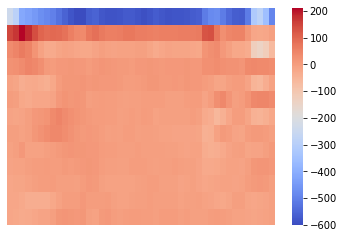

In [ ]:
seaborn.heatmap(data=mfccs[0], cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.show()

In [ ]:
model = tensorflow.keras.models.Sequential([
    tensorflow.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(13,44,1)),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tensorflow.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(units=128, activation='relu'),
    tensorflow.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(mfccs, label, epochs=10, batch_size=32)

Epoch 1/10
44/44 [==============================] - 2s 21ms/step - loss: 1.5205 - accuracy: 0.9235
Epoch 2/10
44/44 [==============================] - 1s 21ms/step - loss: 0.0324 - accuracy: 0.9943
Epoch 3/10
44/44 [==============================] - 1s 25ms/step - loss: 0.0085 - accuracy: 0.9971
Epoch 4/10
44/44 [==============================] - 1s 32ms/step - loss: 0.0097 - accuracy: 0.9971
Epoch 5/10
44/44 [==============================] - 1s 22ms/step - loss: 0.0022 - accuracy: 0.9993
Epoch 6/10
44/44 [==============================] - 1s 21ms/step - loss: 5.1763e-04 - accuracy: 1.0000
Epoch 7/10
44/44 [==============================] - 1s 20ms/step - loss: 1.8047e-04 - accuracy: 1.0000
Epoch 8/10
44/44 [==============================] - 1s 20ms/step - loss: 1.1977e-04 - accuracy: 1.0000
Epoch 9/10
44/44 [==============================] - 1s 20ms/step - loss: 9.5970e-05 - accuracy: 1.0000
Epoch 10/10
44/44 [==============================] - 1s 29ms/step - loss: 8.3491e-05 - accura

In [ ]:
model.save('kws_model2.h5')

1/1 [==============================] - 0s 62ms/step
(13, 44)
prediction bon : [[0.00098328]]


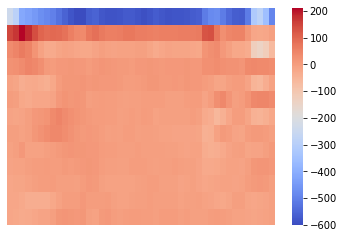

prediction mauvais : [[0.41183206]]


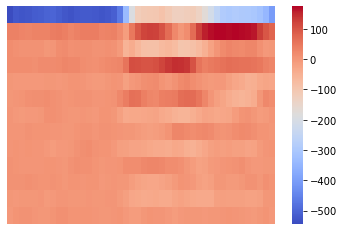

In [ ]:
model = tensorflow.keras.models.load_model('kws_model2.h5')

# Charger le fichier audio
audio_file_bon = '/content/drive/MyDrive/DATA/testing/au_secours_test.wav'
audio_file_mauvais ='/content/drive/MyDrive/DATA/testing/unknown.1ed0b13d_nohash_1.wav.3rugckda.ingestion-5877979785-4ctzf.wav'
samples1, sample_rate1 = librosa.load(audio_file_bon)
samples2, sample_rate2 = librosa.load(audio_file_mauvais)

# Extraire les caractéristiques MFCC
mfccs_bon = librosa.feature.mfcc(y=samples1, sr=22050, n_mfcc=13)
mfccs_mauvais = librosa.feature.mfcc(y=samples2, sr=22050, n_mfcc=13)


mfccs_bon_reshaped = np.reshape(mfccs_bon, (13, 44, 1))
mfccs_mauvais_reshaped = np.reshape(mfccs_mauvais, (13, 44, 1))


# Prédire le mot-clé
prediction_bon = model.predict(np.array([mfccs_bon_reshaped]))
prediction_mauvais = model.predict(np.array([mfccs_mauvais_reshaped]))

mfccs_plot =np.squeeze(np.array([mfccs_bon_reshaped]))
print(mfccs_plot.shape)


seaborn.heatmap(data=mfccs_plot, cmap='coolwarm', xticklabels=False, yticklabels=False)
print(f"prediction bon : {prediction_bon}")
plt.show()
seaborn.heatmap(data=mfccs_mauvais, cmap='coolwarm', xticklabels=False, yticklabels=False)
print(f"prediction mauvais : {prediction_mauvais}")
